<a href="https://colab.research.google.com/github/Danseur1/phasebins-colab/blob/main/Run_Phasebins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A phasebins version for Google Colab
Google Colab removes unused files after several hours, so you must upload all data, etc. from your laptop to Colab everytime you use this version of phasebins.

This removal also includes the removal of Python packages that require explicit installation like lmfit and spephemeris. The downloading of spephemeris.py is automated.

This notebook checks if installation is needed and skips the installation if the needed packages are already available.

The installation of the additional packages is semi-automated. The installation part is automated, but you will typically have to restart the Runtime from the menu above after they are installed.

### Preparation
 - Edit, if needed, the non-filename parameters in the next cell.
 - Collect all the data files (SPE.txt files) into a folder on your laptop.
 - Compress that folder into a zip archive file and remember the location of the zip file. The zip archive should contain the folder with the files inside.
### Install and file upload
 - Execute the cells in this notebook, from the top down.  You can execute a cell by clicking on the 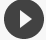 icon at the left.  It wil have a running annimation until the execution has finished. You should check the results from each cell in case an error is reported. You can also execute a cell by clicking on the cell, then while holding down the shift key, press the return (or Enter) key.
 - If told that a restart is need, from the 'Runtime' menu select 'Restart runtime'.  And then execute the cells in this notebook, from the first cell down.  The install step should give a "Modules loaded" message this time.
 - After the Python modules are installed, you will be asked to locate the compressed directory file and it will be uploaded to a subdirectory and the cmdlinetxt variable will be set to read all the *SPE.txt files in that subdirectory.
 - If you rerun the notebook in the same session and want to use the data directory that is already uploaded, cancel the upload and specify the name of the subdirectory to be used.
### executing phasebins 
 - Continue executing cells and the main phasebins program will execute.  This takes a while so be patient.
 - The text and graphs will be produced in the notebook and some graphs will be saved in the PBfiles subdirectory for downloading.



In [1]:
##  phasebins options are usually set here, unless overridden by explicit 
##    assignment to cmdlinetxt in the phasebins program cell bellow.

cmdlinetxt = 'bins=330 firstsigma=10 '


In [2]:
## define an install function for the spephemeris.py module.
def installSPephemeris():
  ''' check if spephemeris.py already exists, 
     if not download from github and import.'''
  from pathlib import Path

  dir_path = '/content/spephemeris'

  if Path(dir_path + '/spephemeris.py').is_file():
    print ("spephemeris.py exists")
  else:
    print ("Downloading spephemeris.py")

    import shutil

    ## delete folder if it exists as cleanup before downloading
    try:
      shutil.rmtree(dir_path)
    except OSError as e:
      print("Error: %s : %s" % (dir_path, e.strerror))

      !git clone https://github.com/Danseur1/spephemeris.git

      from spephemeris.spephemeris import spephemeris

# print( 'Testing installSPephemeris')
# installSPephemeris()
# import spephemeris
# dir( spephemeris)



In [3]:
## These imports should not require installing new modules, so these are sanity checks.
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import codecs
import glob
import pathlib
import os
import sys
import argparse
import hashlib
import time


In [4]:
## Load external routines that may need to be installed
##  These modules typically require that the Colab Runtime be restarted after
##    they are installed.

ImportOkFlag = False
try:
  ## modules we need but may require installation
  import classroom_gizmos
  import astropy
  import lmfit
  import spephemeris.spephemeris as spem
  print('\n Modules loaded.\n')
  ImportOkFlag = True
except ImportError: 
  ## Ref: https://stackoverflow.com/questions/53154369/google-colab-how-to-restart-runtime-using-python-code-or-command-line-interf
  %pip install -U --user classroom_gizmos
  %pip install --user astropy
  installSPephemeris()  ## download spephemeris.py from github and install if necessary.
  %pip install --user lmfit
  print('\nPlease Restart runtime and start again.\n')


 Modules loaded.



In [5]:
display.HTML("<h1>If you did not see 'Modules loaded' message from the previous cell, please restart the runtime and start execution again from the first cell.</h1>")


In [6]:

from pathlib import Path
from zipfile import ZipFile

## Upload zip file, unzip to subdirectory, and set cmdlinetxt to the *SPE.txt files
##    in the subdirectory

print( 'Prepare data files for upload by creating a single zip file of the SPE.txt files.')
print( 'If the data files have already been uploaded to a subdirectory, Cancel the upload step')
print( ' and you will be prompted for the subdirectory name.')

## upload zip file to colab
from google.colab import files
uploaded = files.upload()

if not uploaded == {}:  
  for i, j in enumerate( uploaded):  ## get filename from dictionary
    zipfilename = j
    break  ## if more than one uploaded file, ignore the rest.

  print(f'zipfilename: {zipfilename}')
  with ZipFile( zipfilename, 'r') as zipObj:
    # Extract all the contents of zip file in current directory
    zipObj.extractall()
  dir_name = zipfilename[:-4]
  # print( f'dir_name: {dir_name}, zipfilename: {zipfilename}.')
  cmdlinetxt = cmdlinetxt + dir_name + '/*SPE.txt'

else:
  ## get existing directory name.
  dir_name = ""
  while dir_name == "":
    print( 'Enter the name of the subdirectory with data files:')
    name = input()
    if Path( name).is_dir():
      dir_name = name
    else:
      print( f'Directory {name} was not found.')
  cmdlinetxt = cmdlinetxt + dir_name + '/*SPE.txt'

print( f'cmdlinetxt is {cmdlinetxt}')

print('\nNow run the next cell.')



Prepare data files for upload by creating a single zip file of the SPE.txt files.
If the data files have already been uploaded to a subdirectory, Cancel the upload step
 and you will be prompted for the subdirectory name.


Saving Ellingsen_SPEs.zip to Ellingsen_SPEs.zip
zipfilename: Ellingsen_SPEs.zip
cmdlinetxt is bins=330 firstsigma=10 Ellingsen_SPEs/*SPE.txt

Now run the next cell.


In [8]:
## this is a quick check that the installed modules are available after install steps.
from spephemeris.spephemeris import spephemeris as spem
import lmfit
from classroom_gizmos.handies import mjd2date
# mjd2date( 58687.59)
# dir( spem)

# Below is derived from phasebins0.985

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:522: RuntimeWarning: divide by zero encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:533: RuntimeWarning: invalid value encountered in double_scalars
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


simulated command line arguments:
  bins=330 firstsigma=10 Ellingsen_SPEs/*SPE.txt

<class 'numpy.ndarray'> ============================================

Using file hash tag CZ1IY+15 for plot and info files.





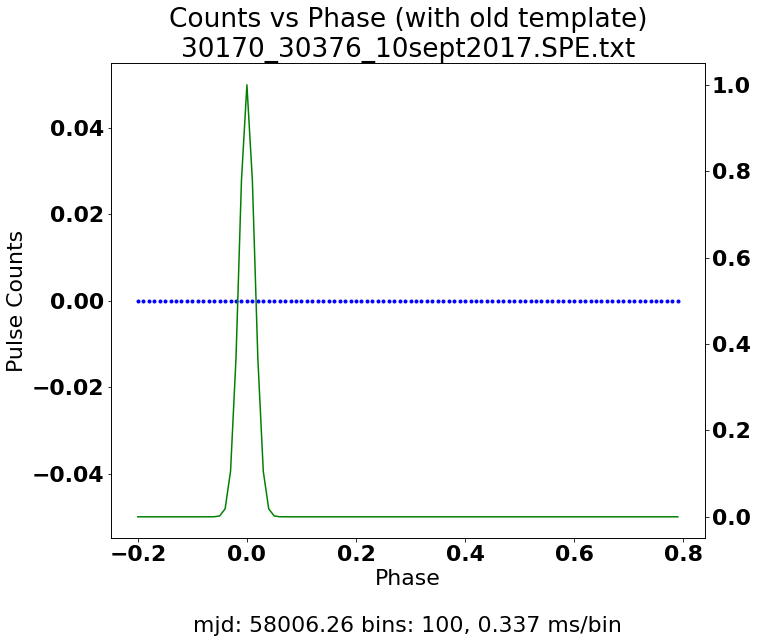

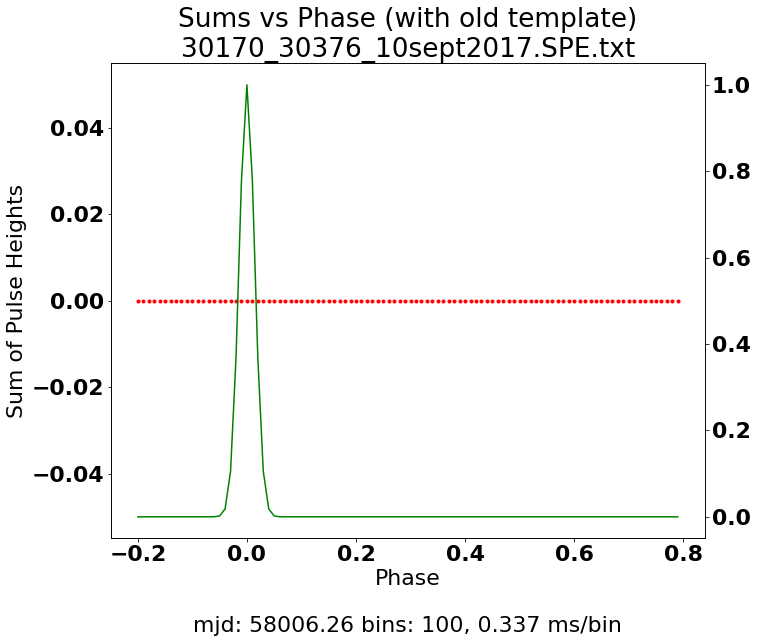

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:522: RuntimeWarning: divide by zero encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:533: RuntimeWarning: invalid value encountered in double_scalars


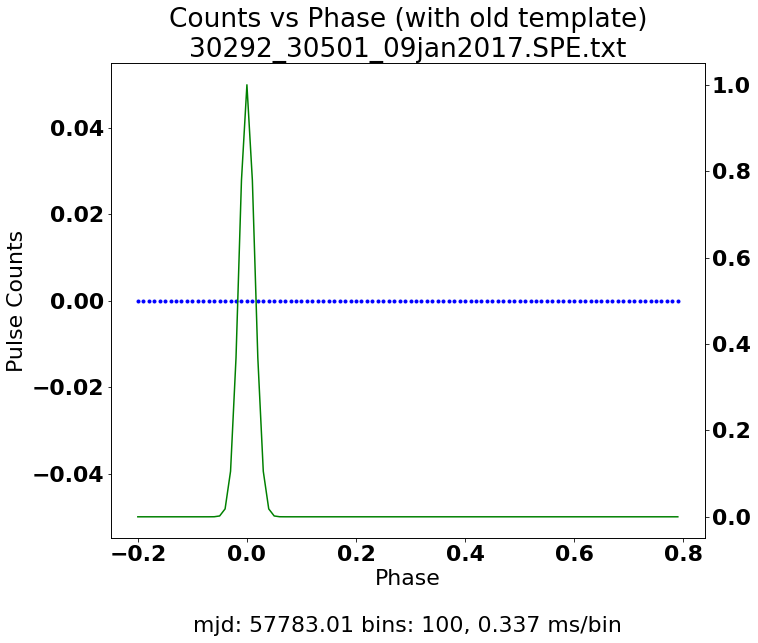

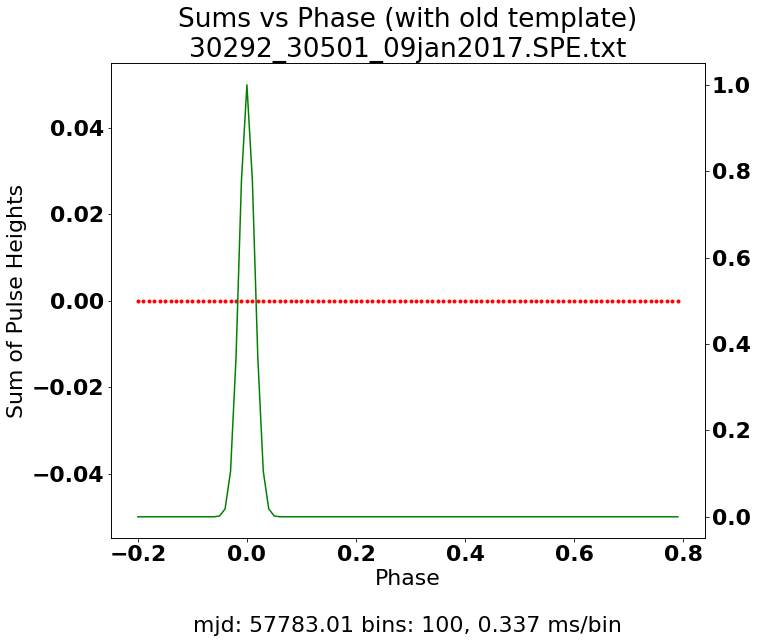

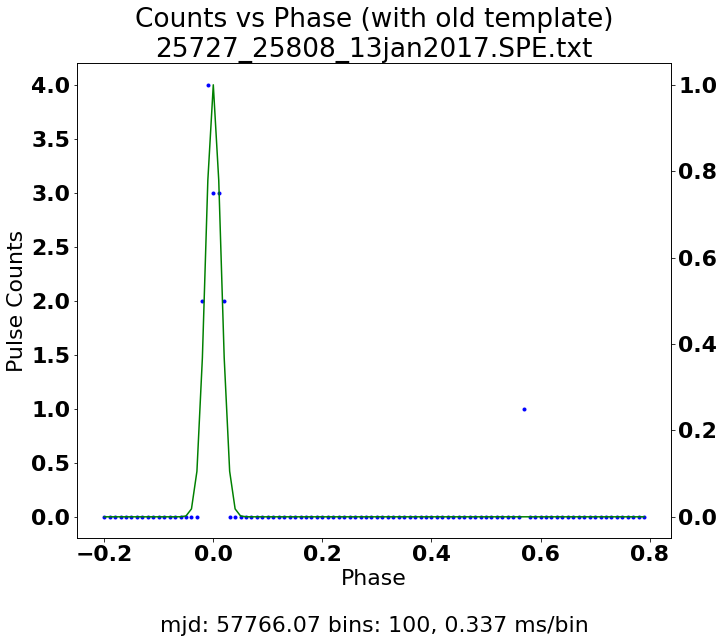

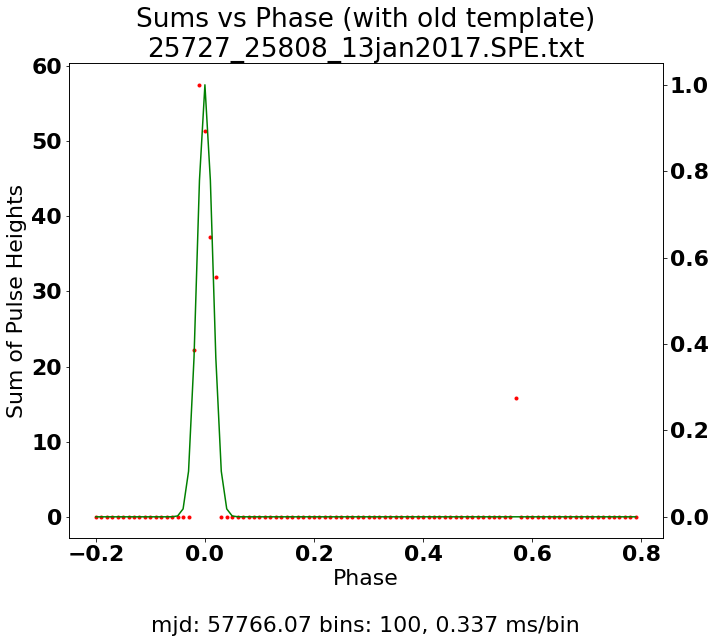

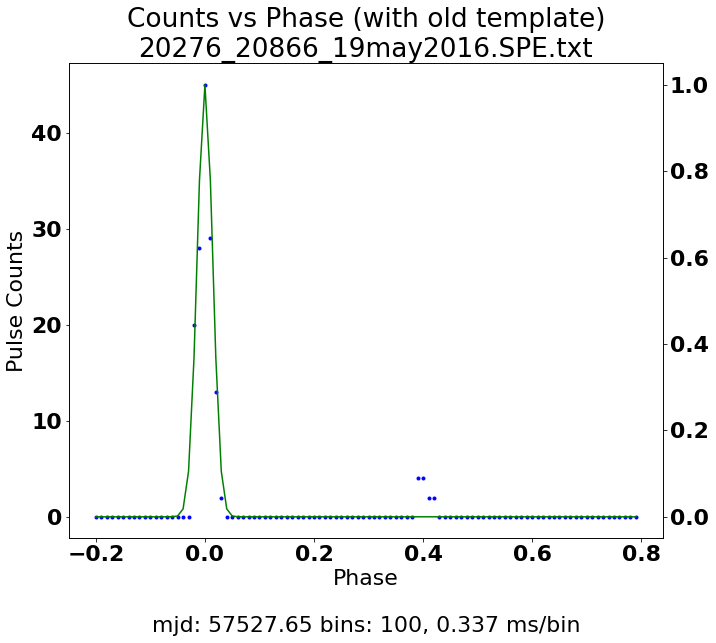

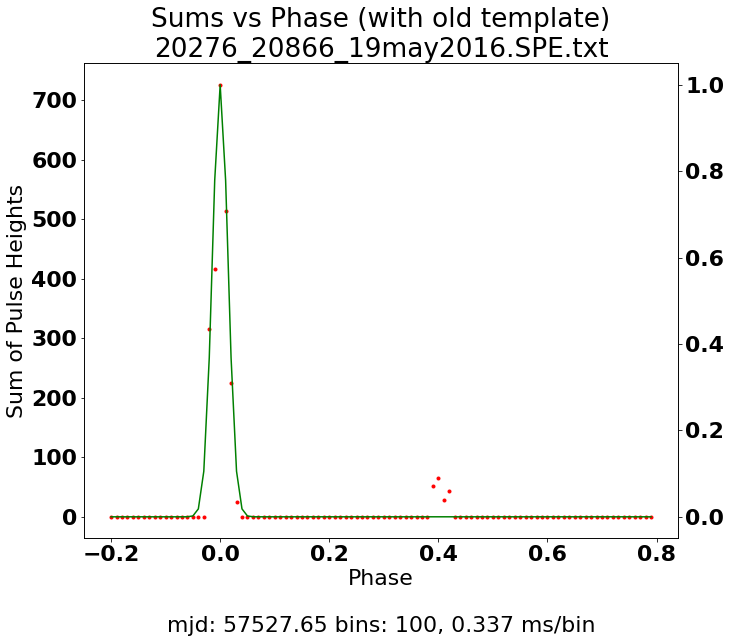

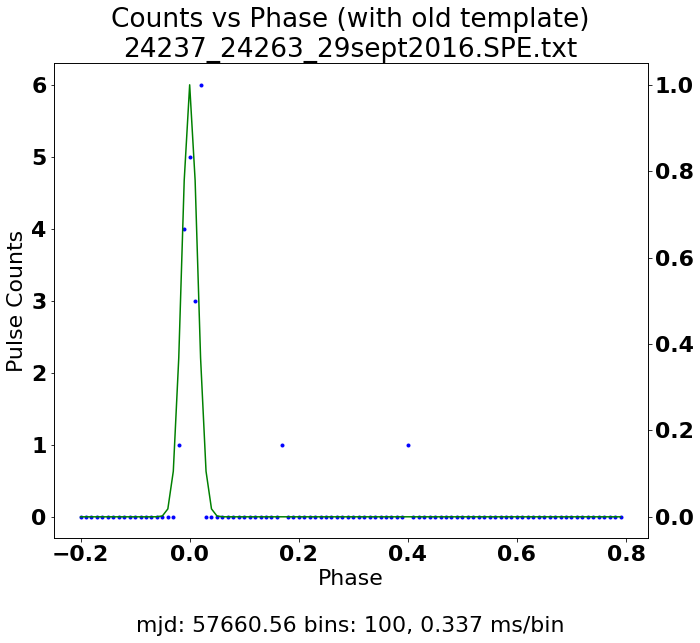

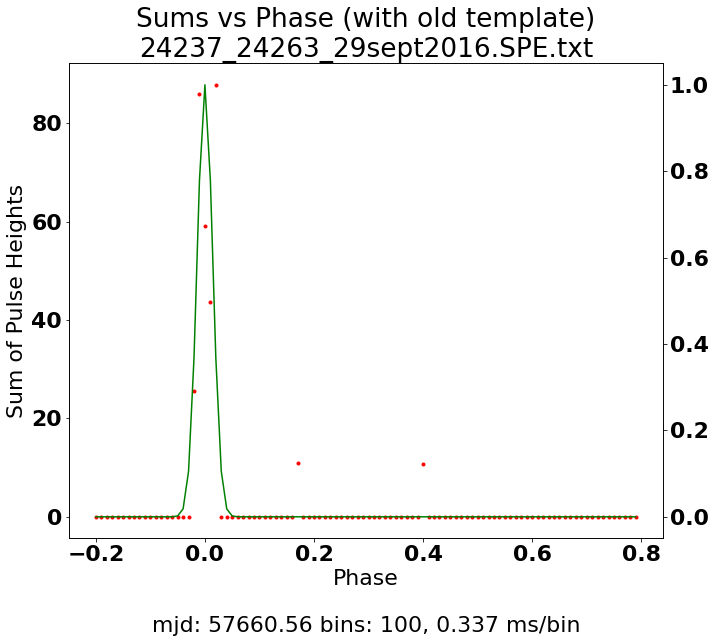

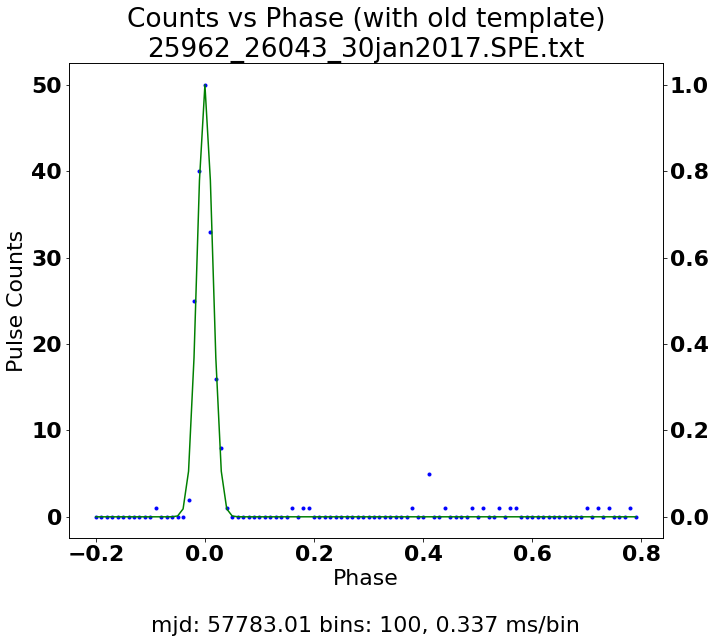

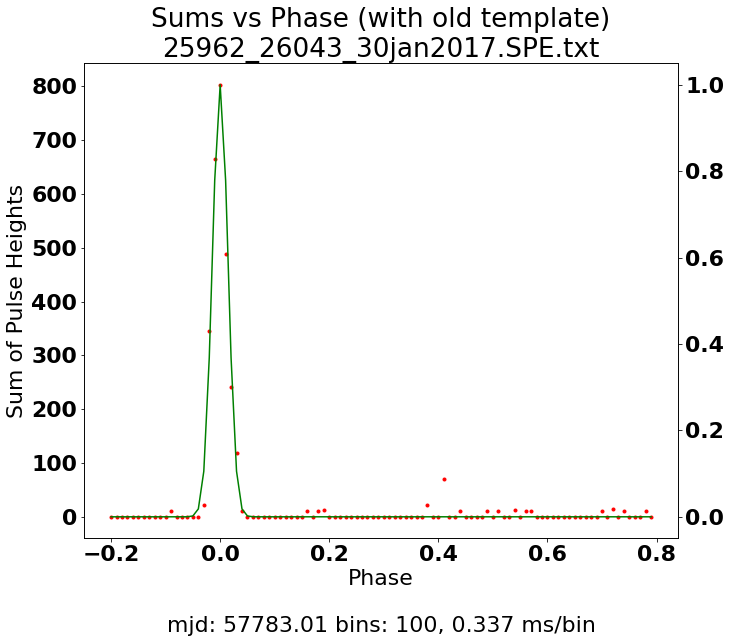




********************************
Observation in file /content/Ellingsen_SPEs/29118_29422_12july2017.SPE.txt was not used because there were
 only 3.0 counts near the "peak" of the distribution.







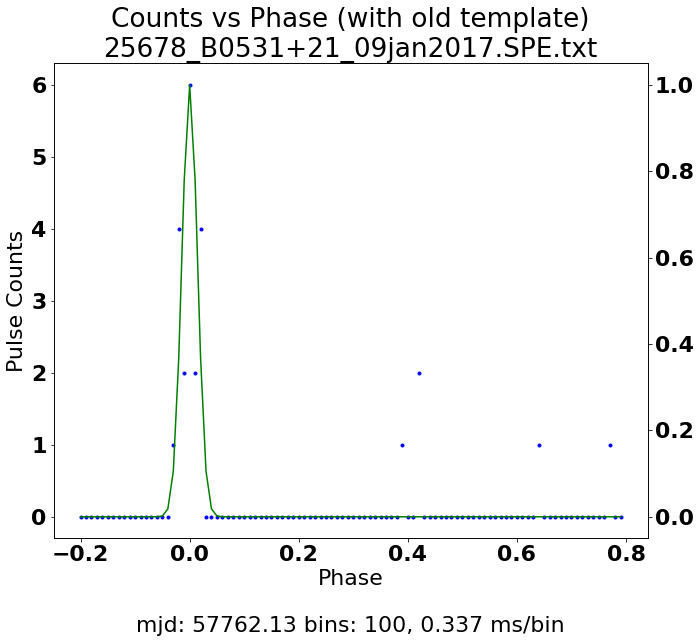

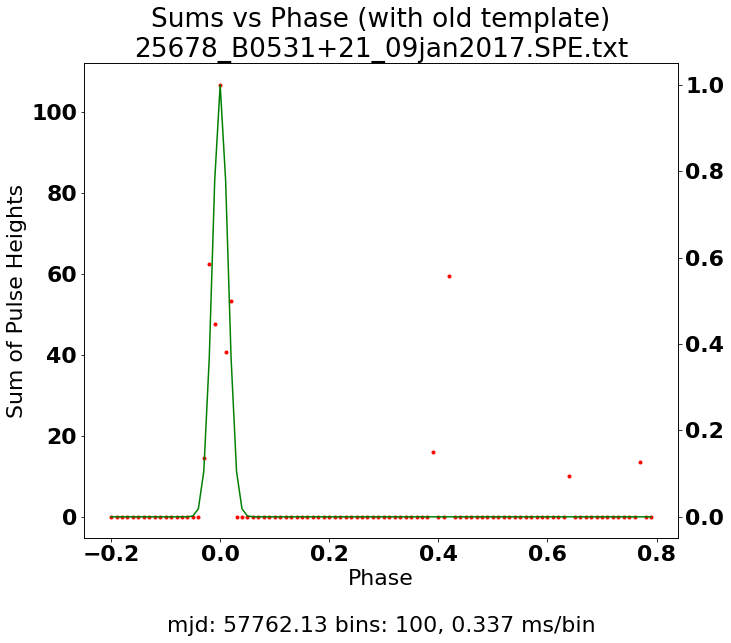

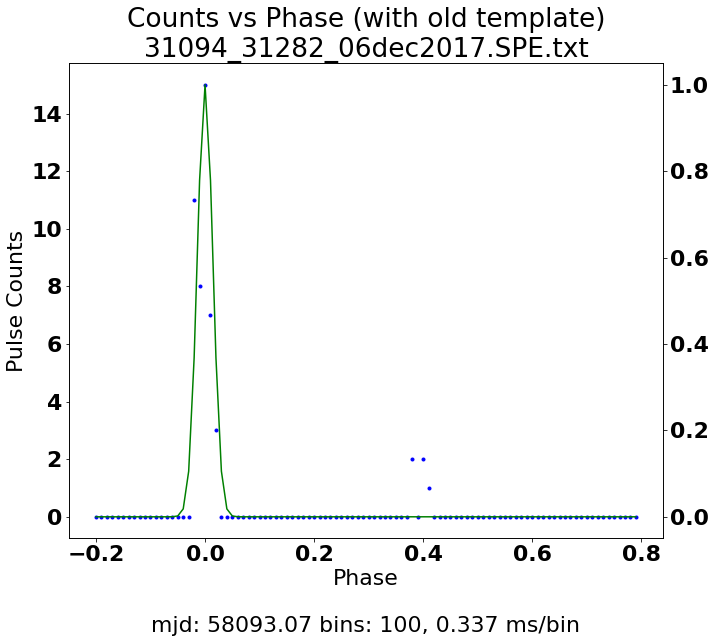

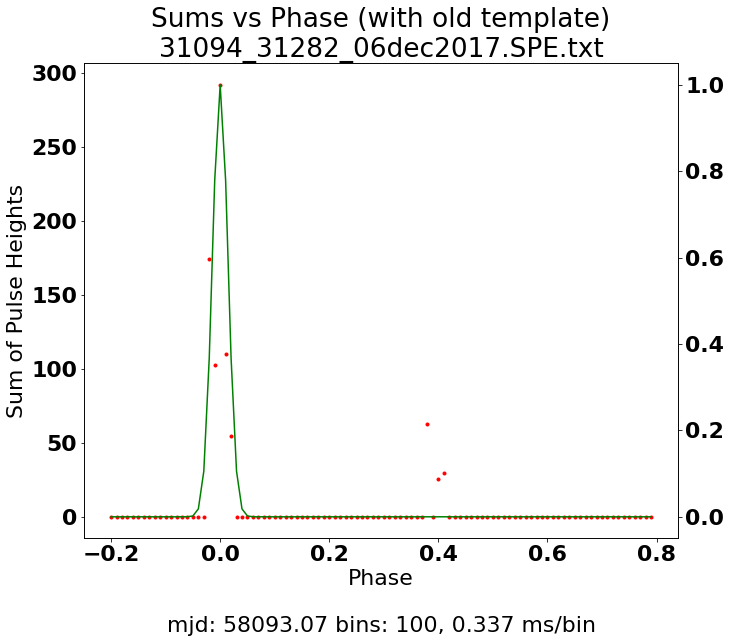




********************************
Observation in file /content/Ellingsen_SPEs/25686_25757_10jan2017 .SPE.txt was not used because there were
 only 4.0 counts near the "peak" of the distribution.







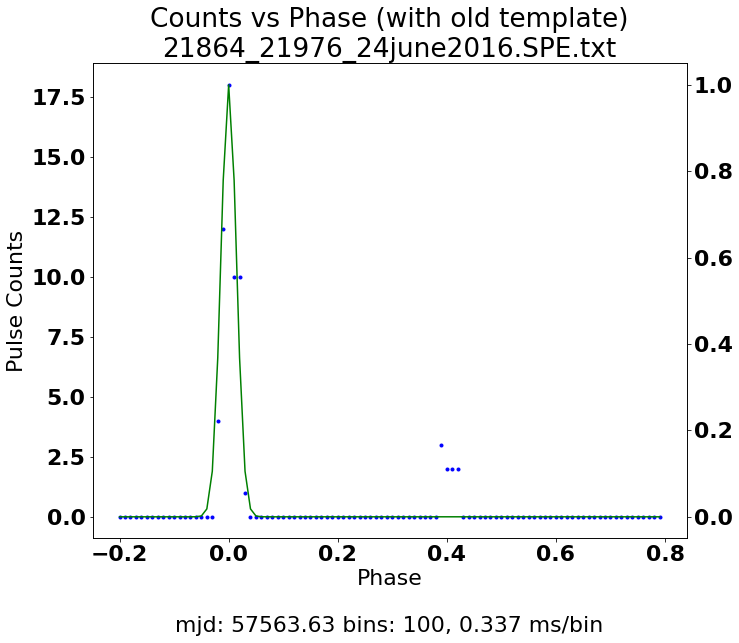

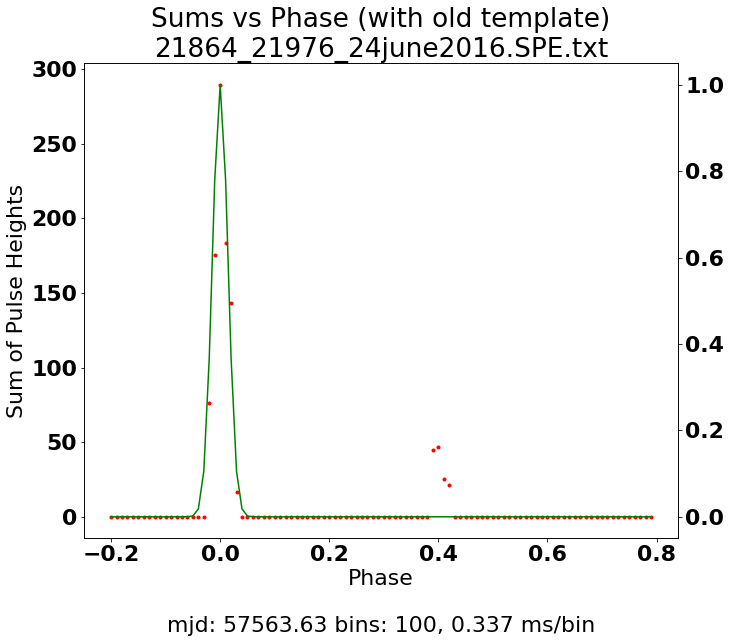

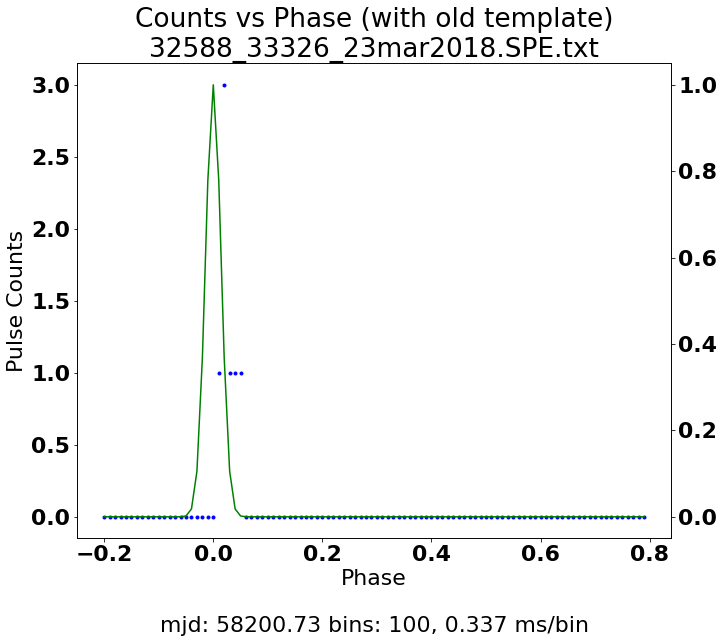

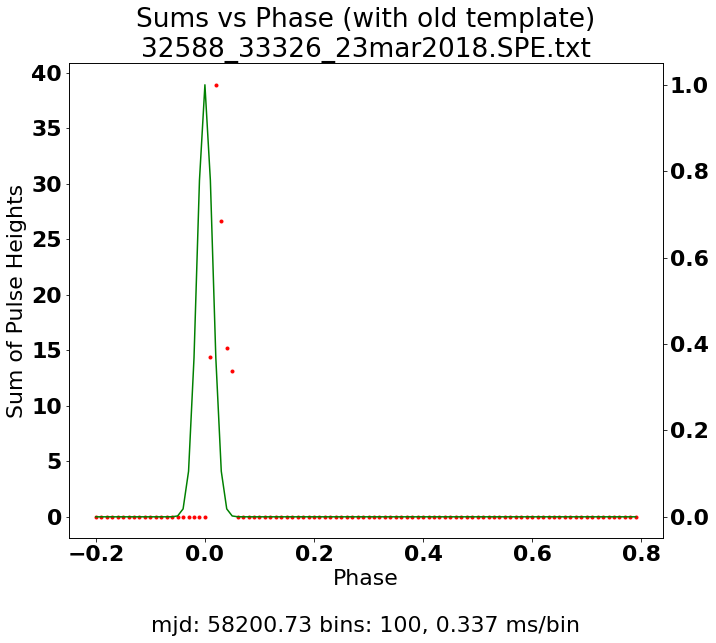

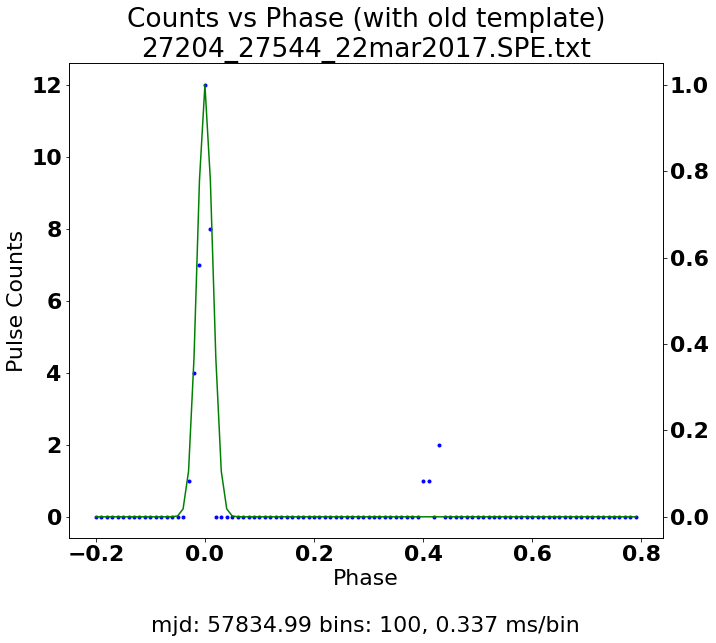

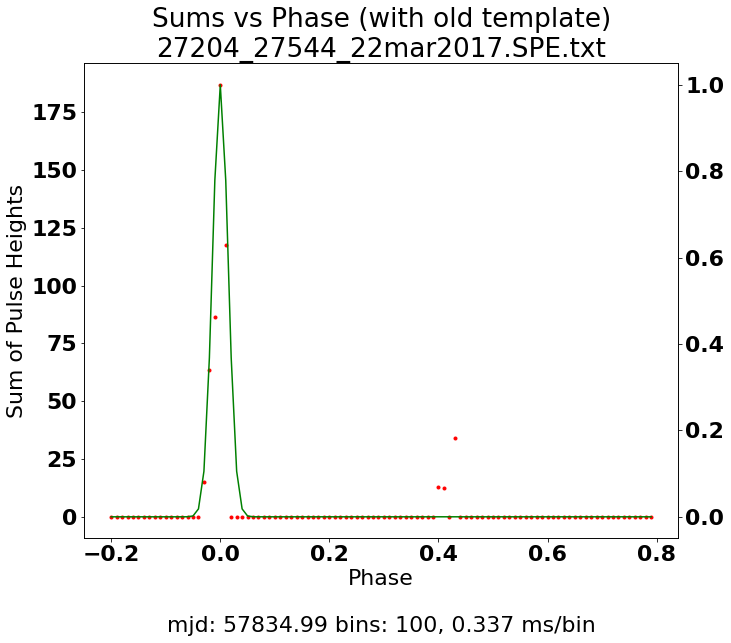

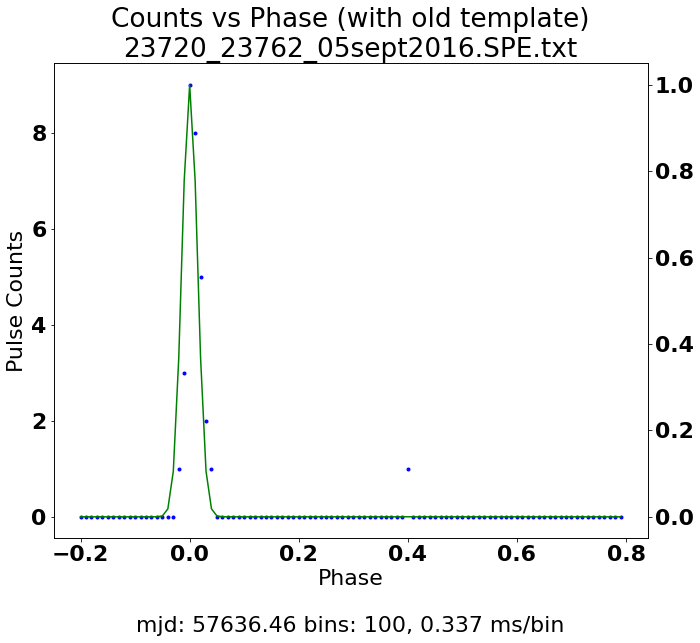

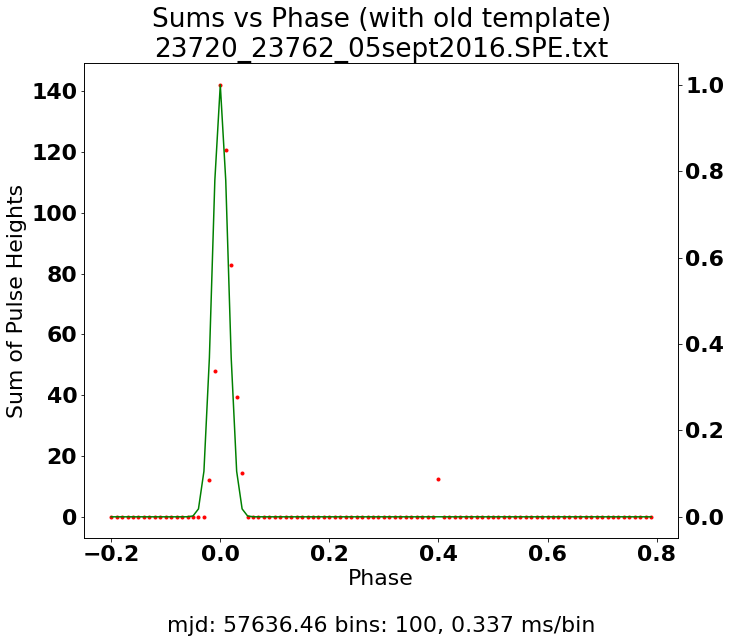

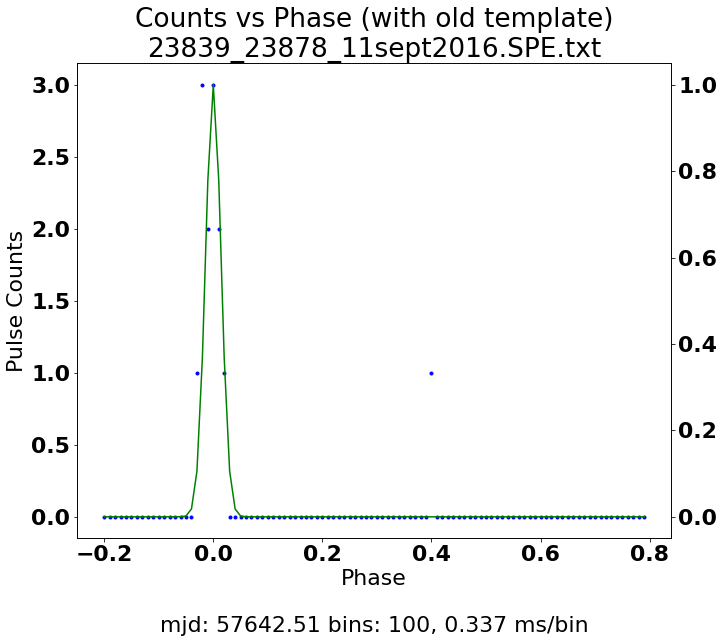

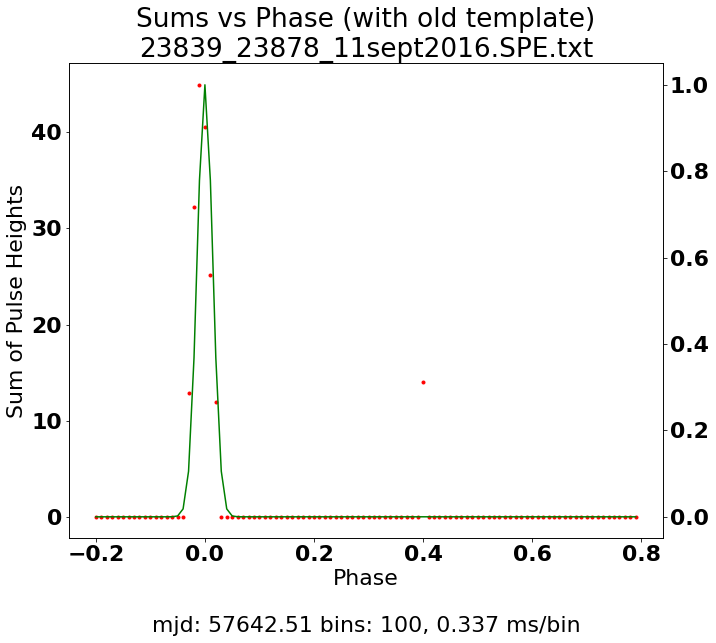



For all files: 9383 sigma values.
0.0 sigmas greater than 300.0
8765 sigmas less than 10.0
Using two gaussians plus a constant.
  ************* Fit Report:  *************
 [[Model]]
    ((Model(G1, prefix='g1_') + Model(G2, prefix='g2_')) + Model(C, prefix='c_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 100
    # variables        = 7
    chi-square         = 938.749225
    reduced chi-square = 10.0940777
    Akaike info crit   = 237.937819
    Bayesian info crit = 256.174011
[[Variables]]
    c_c:           0.12426603 +/- 0.34427241 (277.04%) (init = 0)
    g1_amplitude:  5.48359547 +/- 0.09115284 (1.66%) (init = 4.98)
    g1_center:     0.99954095 +/- 2.6154e-04 (0.03%) (init = 1)
    g1_sigma:      0.01421803 +/- 2.6539e-04 (1.87%) (init = 0.01)
    g1_fwhm:       0.03348090 +/- 6.2493e-04 (1.87%) == '2.3548200*g1_sigma'
    g1_height:     153.863692 +/- 2.46322371 (1.60%) == '0.3989423*g1_amplitude/max(1e-15, g1_sigma

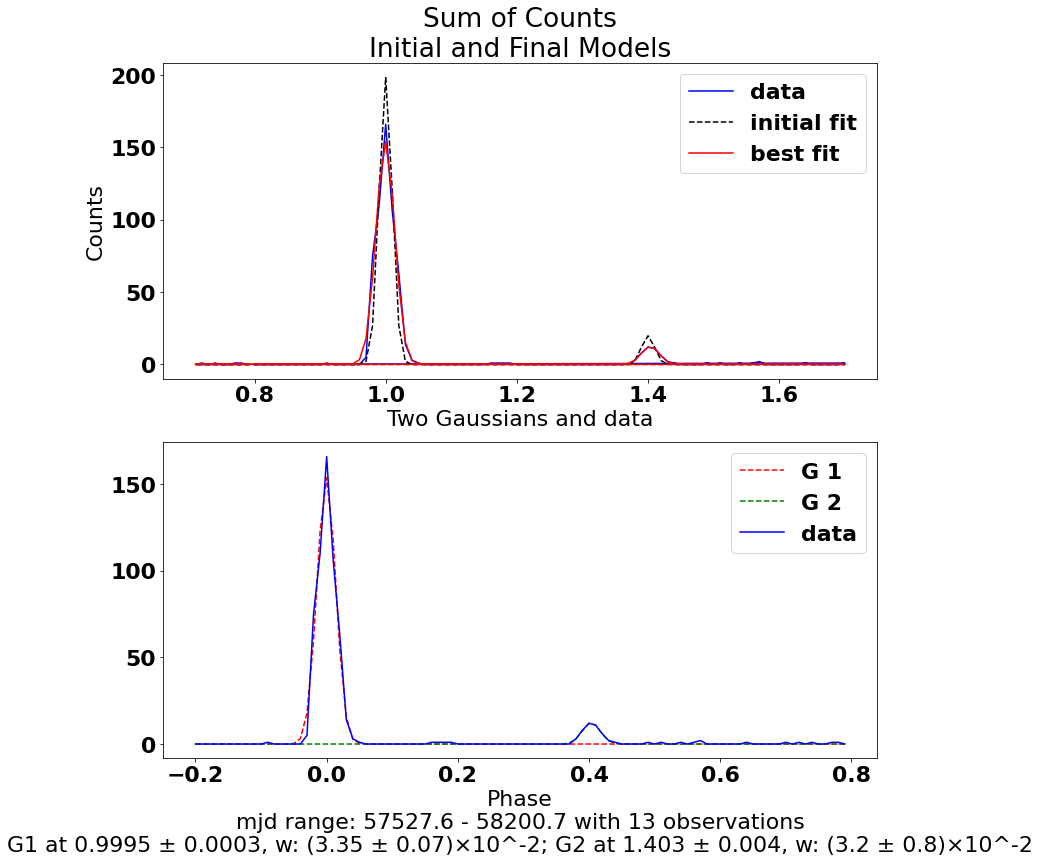

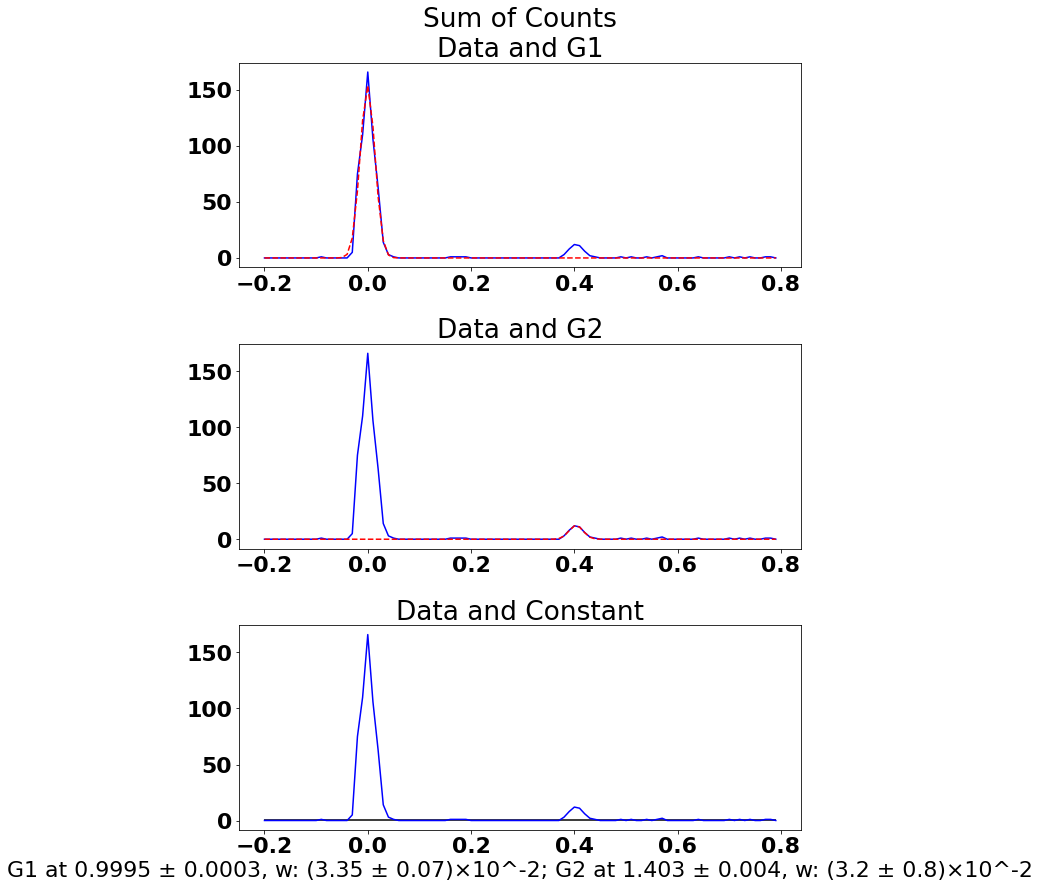


Fit distibutions of Pulse Counts.
constant background: 0.1 ± 0.4 counts
Gaussian 1, height: 154 ± 3 counts, fwhm: (3.35 ± 0.07)×10^-2 phase,
   center: 0.9995 ± 0.0003 phase
Gaussian 2, height: 12 ± 3 counts, fwhm: (3.2 ± 0.8)×10^-2 phase,
   center: 0.4033 ± 0.0003 phase
Using two gaussians plus a constant.
  ************* Fit Report:  *************
 [[Model]]
    ((Model(G1, prefix='g1_') + Model(G2, prefix='g2_')) + Model(C, prefix='c_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 100
    # variables        = 7
    chi-square         = 233558.903
    reduced chi-square = 2511.38605
    Akaike info crit   = 789.601940
    Bayesian info crit = 807.838131
[[Variables]]
    c_c:           1.25801774 +/- 5.45600610 (433.70%) (init = 0)
    g1_amplitude:  86.2490922 +/- 1.41761031 (1.64%) (init = 80.8971)
    g1_center:     0.99970566 +/- 2.5194e-04 (0.03%) (init = 1)
    g1_sigma:      0.01384144 +/- 2.5557e-04 (1.85%) (init 

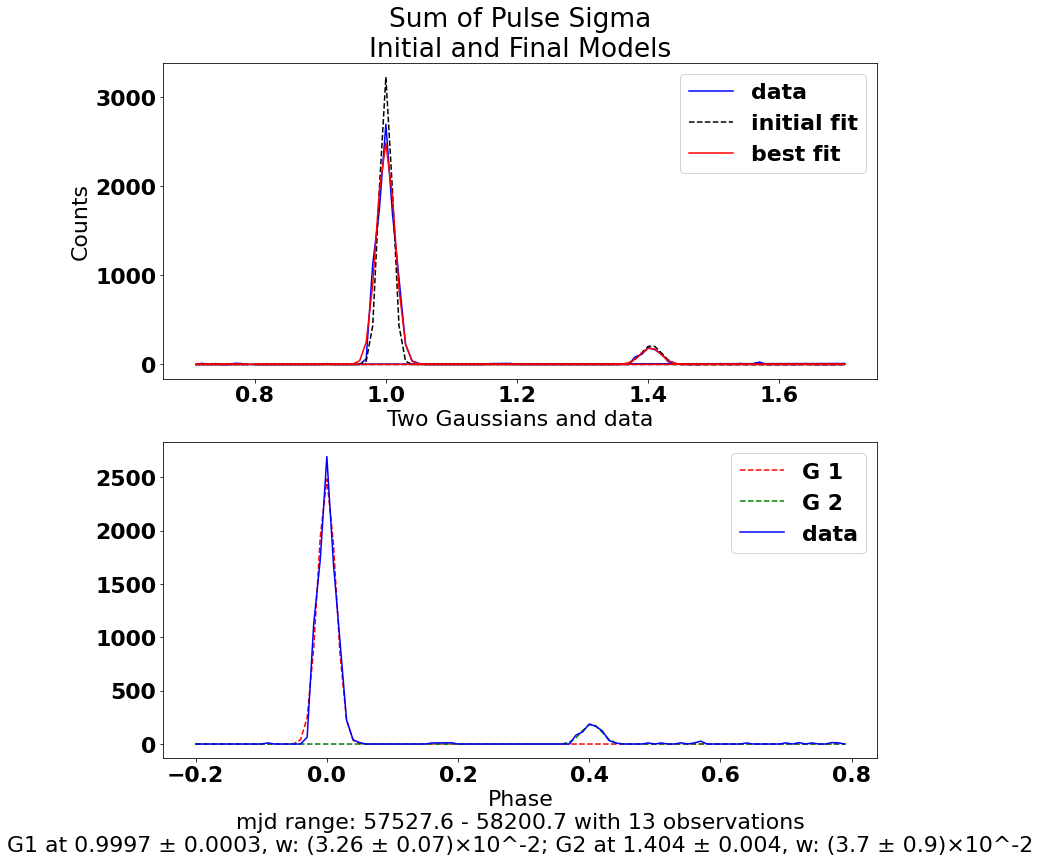

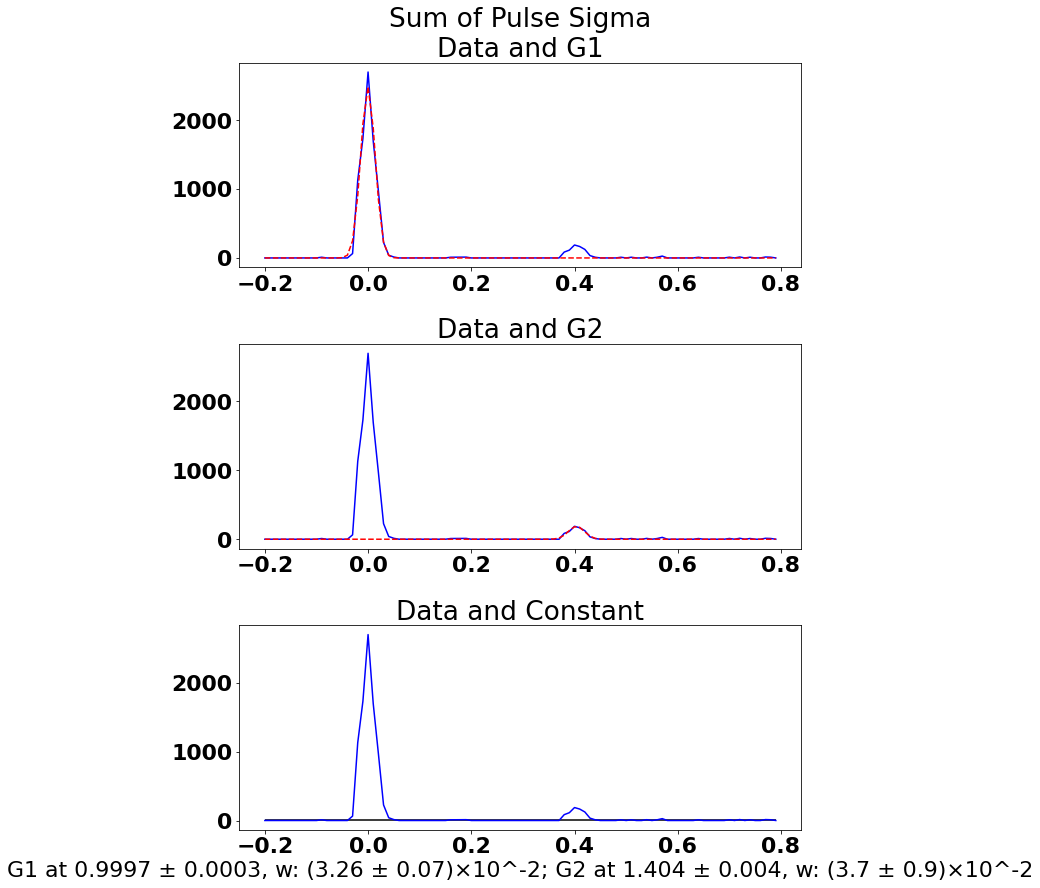


Fit distibutions to two gaussians and a constant.
constant background: 1 ± 6 counts
Gaussian 1, height: 2490 ± 40 sigmas, fwhm: (3.26 ± 0.07)×10^-2 phase,
   center: 0.9997 ± 0.0003 phase
Gaussian 2, height: 190 ± 40 sigmas, fwhm: (3.7 ± 0.9)×10^-2 phase,
   center: 0.4037 ± 0.0003 phase


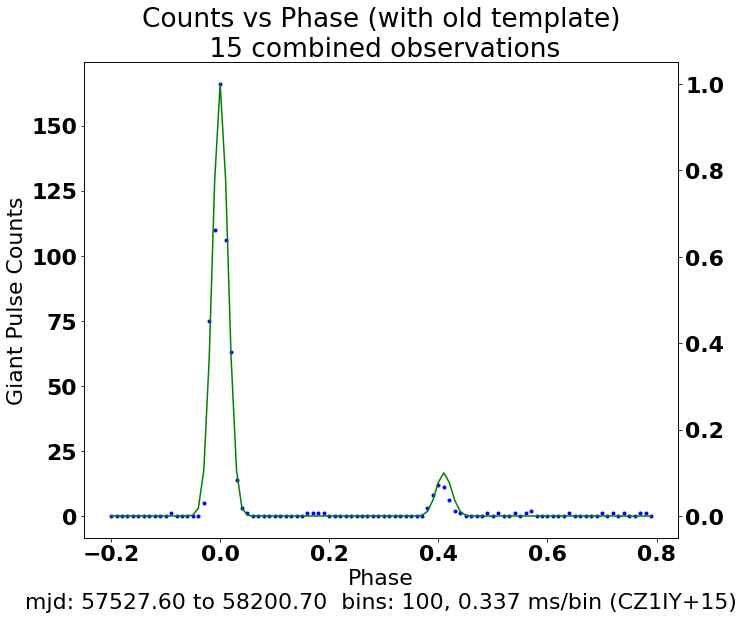

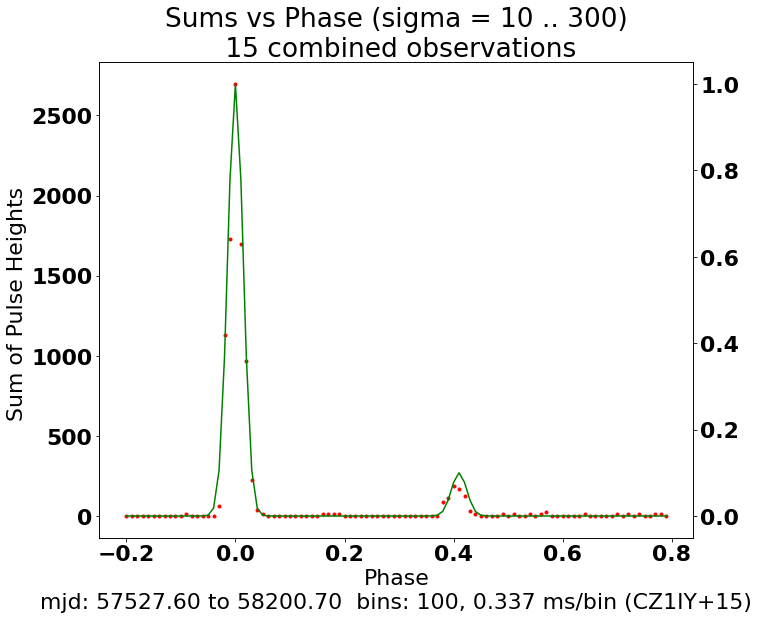

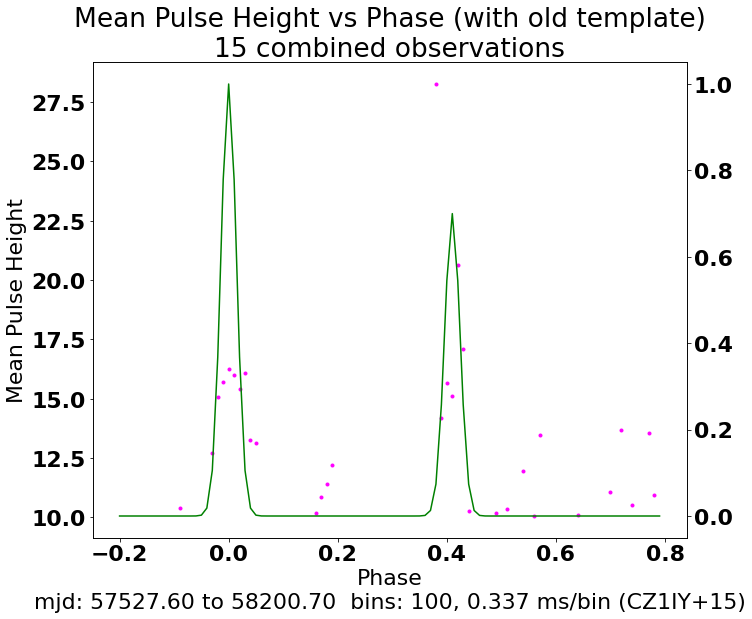

In [9]:
#@title
#!/usr/bin/env python
## Create plots of giant pulses vs phase: counts, sums, and avg.
##  Version 0.97
##----- Time-stamp: <2020-12-27T16:59:20.707730-05:00 hedfp> -----
##TS: 2019-02-16T13:02:23-05:00
##
## For informattion on using this program, run it with just the
##       --help parameter.
##
## 2018-08-24 /Carl Schmiedekamp/ initial; starting with pulsebins.py
## 2018-09-03 /Carl Schmiedekamp/ version 0.9
## 2018-11-20 /Carl Schmiedekamp/ version 0.91:
##            revised to use spephemeris module for phase calculation
##            based on Jodrell Bank Crab Pulsar Ephemeris data
## 2018-11-28 /Carl Schmiedekamp/ added peak location code using
##            cross correlation with a gaussian function.
## 2018-12-08 /Carl Schmiedekamp/ 
## 2019-01-19 /Carl Schmiedekamp/ version 0.972:
##          - template centered at phase 0.5;
##          - shift calculated from counts data and applied to all three plots.
#3          - data is shifted to template (at 0.5 phase)
##          - moved cmdlinetxt to near beginning of program to make it easier
##              to change.
## 2019-02-16 /Carl Schmiedekamp/ version 0.973
##          - now shifts to phase 0.5, then combines runs 
##          - counts and sums plotted for each file.
##          - total counts, sums and avg. plotted for combined data.
##          - multiple file plot files have file hash as part of file name.
##          - Saving data files is not tested.
## 2020--7-02 /Carl Schmiedekamp/ version 0.981
##          - Changed iphone to hardcoded and made hardcoded command-line
##            automatic if there are no actual command-line arguments.
##          - Added filenames to individual plots and file count to combined
##            plots.
##          - Rearranged the parts of the plt file names so that the hashtag is
##            first, so all plts of same files will list together.
## 2020-07-05 /Carl Schmiedekamp/ version 0.982
##          - added number of bins to the file tag hash.
## 2020-07-30 /Carl Schmiedekamp/ changed default firstsigma to 10, lastsigma to 300.
## 2020-08-04 /Carl Schmiedekamp/ added fitting to two peaks using lmfit package.
## 2020=09-06 /Carl Schmiedekamp/ removed initial values of some fit parameters, to
##               hopefully get lmfit to generate uncertainties.
##               Also switch to constant model instead of linear.
## 2020-09-14 /Carl Schmiedekamp/ added Caption argument that is added to all plots.
## 2020-11-22 /Carl Schmiedekamp/ trying to integrate gaussian fitting using
#
#

from __future__ import print_function
from __future__ import division

from math import floor, log10, ceil

import argparse
import hashlib
import sys
import os

import glob
import pathlib

import codecs
import numpy as np
from numpy.fft import fft, ifft, fftshift
##from numpy.fft import fft2, ifft2
#import math
import matplotlib
import matplotlib.pyplot as plt

# from lmfit.models import LinearModel, GaussianModel, ConstantModel
from lmfit.models import GaussianModel, ConstantModel
 
# spephemeris.py is in subdirectory on Colab
from spephemeris.spephemeris import spephemeris as spem
# import spephemeris as spem ## calculates arrival times, periods and phases.

import time


defaultCaption = ''


def getUsername():
    '''Get current username'''
    import getpass
    return( getpass.getuser())
    
user = getUsername()
user = 'skip' ## for debugging  DBug
if user in [ 'cws2', 'hedfp']:
    # ### To Do items:
    print( '\n\nThe To Do List:')
    print( '*:  Need criteria for not including obs. if too few pulses.')
    print( '*:     A minimum peak count parameter, less means do not use obs?')
    print( '*:  Do we need a hash for single file plots??')
    print( )
    # ok = input( 'To Do list end.\n Press enter to continue: ')
    # print( '*:  add file hash to plots along with mjd (spef.obsepoch) range (at bottom?).')
    # print( '     also, add number of phase bins and ms/bin (spef.period( mjd)/nbins).')
    # print( '*:  check mjd\'s and include first and last in plots')
    # print( '*:  Add parameter for "Caption" for plots.')
    # print( '*:  add a <HASH>-info.txt file to list observations used.')
    # print( '*:  fix fit center (from lmfit), etc to be between 0 and 1 (wrap them back)')
    # print( '*:  Add parms to allow lower sigma for finding peak location? We might be')
    # print( '     able to get a better peak location if we use lower sigmas.')
    #  now uses all points to locate peak and determine shift needed.
    # print( '     We might even get some regular pulsar pulses.')

    print( 'Continuing in 10 seconds.')
    time.sleep(10)






#>>>>  Set up simulated command line; ignored if hardcoded is False.
###
##=======  Start code to simulate command line parameters.


## for Colab, the cmdlinetxt string is usually set when the data files are uploaded.
##  you can change it here to overide that string.

# cmdlinetxt =  '--help'  ## leave this uncommented as default hardcoded argument.

# cmdlinetxt =  '--bins=50 26186_26260.SPE.txt'
# cmdlinetxt =  '--bins=100 --first=5 Fake-test+1e-6off.SPE.txt'
# cmdlinetxt =  '--bins=100 --first=5 Fake-test-1e-6off.SPE.txt'
#   Fake-test.SPE.txt is constant period with 26186_26260.SPE.txt data:
# cmdlinetxt =  '--bins=100 --first=5 Fake-test.SPE.txt'
# cmdlinetxt =  '--firstsigma=10 --bins=360 31094_31282.SPE.txt'
# cmdlinetxt =  '--firstsigma=10 --bins=50 26186_26260.SPE.txt 31094_31282.SPE.txt'

# # ## Testing captioning
# # ### command line caption:
# cmdlinetxt = r'--caption=Testing\ntesting\nThis\N{space}is\x20a\N{space}test. '+\
#     r'--firstsigma=10 --bins=50 26186_26260.SPE.txt 31094_31282.SPE.txt'

# # ### caption from internal variable
# defaultCaption = '''A test
# of a caption
# from the 'defaultCaption' variable.'''
# cmdlinetxt = r'--firstsigma=10 --bins=50 26186_26260.SPE.txt 31094_31282.SPE.txt'

# cmdlinetxt =  r'--firstsigma=10 --bins=50 '+\
#     r'--caption=This\N{space}is\na\x20test. 26186_26260.SPE.txt 31094_31282.SPE.txt'

# cmdlinetxt = r'--bins=100 --caption=Testing\ntesting\nThis\N{space}is\x20a\N{space}test. '+\
#             ' 26186_26260.SPE.txt 31094_31282.SPE.txt'

# basedir = ' ../InProgress/ACURA-Radio-Astro-class-stuff/SinglePulse-GiantPulses/ACURA-2019-20/Vela/'
# cmdlinetxt = r'--bins=100 --caption=Vela_Test --firstsigma=5 '
# cmdlinetxt = cmdlinetxt + basedir + 'J0835-45_10Aug_46384outSP.out.vela-SPE.txt'
# cmdlinetxt = cmdlinetxt + basedir + '8jul2020/J0835-45_08Jul_45330_outSP.vela-SPE.txt'

# cmdlinetxt = r'--bins=100 --caption=Vela_Test --firstsigma=5 --psep=0.02 ' +\
#                  '*vela-SPE.txt'


# cmdlinetxt =  '--bins=100 26186_26260.SPE.txt'
# cmdlinetxt =  '--firstsigma=10 --bins=360 26186_26260.SPE.txt'
# cmdlinetxt =  '--debug  --bins=50 26186_26260.SPE.txt'
# cmdlinetxt =  '--debug --bins=20 26186_26260.SPE.txt'
# cmdlinetxt =  '--bins=100 26291_26609.SPE.txt'
# cmdlinetxt = '--bins=100 firstsigma=10 26186_26260.SPE.txt'
#cmdlinetxt =  '--bins=100 --caption=Something_or_the_Other 26186_26260.SPE.txt 26291_26609.SPE.txt'
# cmdlinetxt =  '--bins=100 26186_26260.SPE.txt 26291_26609.SPE.txt'

# ##Example: many files in SPE subdirectory (Windows path separators)
# cmdlinetxt = r'--bins=100 --first=10 ' +\
# r'SPE\20276_20866.SPE.txt SPE\21864_21976outSP.SPE.txt '+\
# r'SPE\22158_22211outSP.SPE.txt '+\
# r'SPE\23329_23346outSP.SPE.txt SPE\23822_23859outSP.SPE.txt SPE\23839_23878outSP.SPE.txt '+\
# r'SPE\24170_24201.SPE.txt SPE\24237_24263.SPE.txt SPE\24446_24473outSP.SPE.txt '+\
# r'SPE\25435_25507.SPE.txt SPE\25678_25747.SPE.txt SPE\25686_25757.SPE.txt '+\
# r'SPE\25782_25858ourSP.SPE.txt SPE\25799_25878outSP.SPE.txt SPE\25825_25908.SPE.txt '+\
# r'SPE\26186_26260.SPE.txt SPE\26291_26609.SPE.txt SPE\26325_26653.SPE.txt '+\
# r'SPE\26613_26943.SPE.txt SPE\27204_27544outSP.SPE.txt SPE\27510_27877.SPE.txt '+\
# r'SPE\27919_28286.SPE.txt SPE\29118_29422.SPE.txt SPE\31094_31282.SPE.txt '+\
# r'SPE\32588_33326.SPE.txt SPE\B0531+21_N1_25727_25808.SPE.txt '+\
# r'SPE\Skynet_57636_B0531+21_N1_23720_23762.output.SPE.txt '+\
# r'SPE\Skynet_57783_B0531+21_N1_25962_26043_0001.output.SPE.txt'
# ###

# ##Example: many files in SPE subdirectory (linux / macos path separators)
# cmdlinetxt = r'--bins=100 SPE/20276_20866.SPE.txt SPE/21864_21976outSP.SPE.txt '+\
#     r'first=5 last=6' +\
# r'SPE/22158_22211outSP.SPE.txt '+\
# r'SPE/23329_23346outSP.SPE.txt SPE/23822_23859outSP.SPE.txt SPE/23839_23878outSP.SPE.txt '+\
# r'SPE/24170_24201.SPE.txt SPE/24237_24263.SPE.txt SPE/24446_24473outSP.SPE.txt '+\
# r'SPE/25435_25507.SPE.txt SPE/25678_25747.SPE.txt SPE/25686_25757.SPE.txt '+\
# r'SPE/25782_25858ourSP.SPE.txt SPE/25799_25878outSP.SPE.txt SPE/25825_25908.SPE.txt '+\
# r'SPE/26186_26260.SPE.txt SPE/26291_26609.SPE.txt SPE/26325_26653.SPE.txt '+\
# r'SPE/26613_26943.SPE.txt SPE/27204_27544outSP.SPE.txt SPE/27510_27877.SPE.txt '+\
# r'SPE/27919_28286.SPE.txt SPE/29118_29422.SPE.txt SPE/31094_31282.SPE.txt '+\
# r'SPE/32588_33326.SPE.txt SPE/B0531+21_N1_25727_25808.SPE.txt '+\
# r'SPE/Skynet_57636_B0531+21_N1_23720_23762.output.SPE.txt '+\
# r'SPE/Skynet_57783_B0531+21_N1_25962_26043_0001.output.SPE.txt'
# ###

# cmdlinetxt = '--bins=100 --allplots SPE/*.SPE.txt'
# cmdlinetxt = '--bins=100 SPE/*.SPE.txt'

# cmdlinetxt =  '--bins=110 --first=7 26186_26260.SPE.txt'


####################
# cmdlinetxt = '--bins=330 firstsigma=10 '+\
#     r'b0531_20sep2020SPOut.SPE.txt '+\
#     r'b0531_15sep2020SPOut.SPE.txt '+\
#     r'b0531_10ct2020SPOut.SPE.txt'
# 
#####################
# cmdlinetxt = '--bins=330 firstsigma=10 '+\
#   r'Ellingsen_SPEs/*SPE.txt'

#>>> END simulated command line section



hardcoded = True  ## set to True to force simulated command line arguments.
     
    ##  False will parse arguments from command that started script.
    ## HOWEVER, if there are no command line arguments, the hardcoded is used anyway.
    
DBugFlag = False   ## this overides --verbose parameter and if True causes
                  ##  lots of debug output.

## Criteria for deciding if observation has enough pulses to be aligned with
##   the template.
peak_phase_width = 0.05  ## expected distribution peak width in phase (0..1).
                         ## Usinng all pulses, not just those above --first
                         ## or (firstsig).
minimum_peak_count = 6   ## If there are fewer pulses that this number,
                         ## the observation is not used.
                  
###---- Plot text formatting
## Ref: http://ishxiao.com/blog/python/2017/07/23/how-to-change-the-font-size-on-a-matplotlib-plot.html
                  
font = {'family' : 'normal',  ## also serif
        'weight' : 'bold',
        'size'   : 22}    
matplotlib.rc('font', **font)       


##--- plot size parameters
topp = 0.75
bottomp = 0.2
rightp = 0.8
leftp = 0.25
widthp = 15.0
heightp = 12.0

## create a gaussian template for the phase arrival profile of the pulses.
tpeak = 0.0                ## phase of the peak
wpeak = 0.02            ## phase width of peak in rotations
phstart = -0.2          ## starting phase value, generates one cycle.
#### end gaussian template description

##----

#>>> Little functions to format numbers on graphs
#
### Round numbers to sig figs.
### Ref: https://stackoverflow.com/questions/3410976/how-to-round-a-number-to-significant-figures-in-python
def round_sig(x, sig=6, small_value=1.0e-9):
    return round(x, sig - int(floor(log10(max(abs(x), abs(small_value))))) - 1)


def VURound( value, uncertainty, undig=1):
    '''
    Returns a string with rounded value and uncertainty.
    Round value based on uncertainty.
    Uncertainty is rounded up to "undig" sug.figs.
      'undig' is currently ignored, set at 1
      Based on Javascript function by Carl Schmiedekamp
    '''
    from math import copysign, log10, floor, ceil
    
    #soecial case: uncertanity is zero: return value as string.
    if uncertainty==0:
        return str( value)
    
    sign = copysign( 1,value)
    
    valin = abs( value)
    uncin = abs( uncertainty)
    
    dec = log10(uncin)
    # print('DBug uncin, dec, uncertainty', uncin, dec, uncertainty)
    dec = floor(dec+1)-1
    
    uncmant=uncin*pow(10.0,-1*dec)
    
    if uncmant > 9: ##Fix if rounding up adds another digit.
        dec = dec + 1
        uncmant=uncin*pow(10.0,-1*dec);
    
    if round( uncmant) != uncmant:  ##round larger if sigmant is not integral
        uncmant=int( uncmant+1);
    
    ## for values between .1 and 9999. use 2 part output (also equal to zero)
    if (valin >= .1 and valin <=9999.) or (valin == 0.0):
        if dec > 0:
            nd = 0
        else:
            nd = -dec
            
        fmtstr = '{'+':22.{}f'.format( nd)+'}'
#        print( 'DBug: fmtstr: {}'.format( fmtstr))
        
        if sign < 0:
#            val3p=str(int(valin*pow(10,-dec)+0.5)*pow(10,dec)*sign)
            val3p=fmtstr.format( int(valin*pow(10,-dec)+0.5)*pow(10,dec)*sign).strip()
        else:
#            val3p=str(int(valin*pow(10,-dec)+0.5)*pow(10,dec))
            val3p=fmtstr.format( int(valin*pow(10,-dec)+0.5)*pow(10,dec)).strip()
            
#        print( 'DBug: valin: {}, dec: {}, val3p: {}, nd: {}'.format( valin, dec, val3p, nd))
        
        unc3p = fmtstr.format( uncmant*pow(10,dec) ).strip()
        
        return ('{} '+u"\u00B1"+ ' {}').format( val3p, unc3p)
        
    else:  ##  otherwise use 4 part output
        
        val=int(valin*pow(10,-dec)+0.5)*pow(10,dec)*sign
        if valin >= uncin:
            exp=ceil(log10(valin))-1
        else:
            exp=ceil(log10(uncin))-1
        
        
        nd = -( dec - exp)
        
        if nd < 0:
            nd = 0
            
        fmtstr = '{'+':22.{}f'.format( nd)+'}'
#        print( 'DBug: fmtstr: {}'.format( fmtstr))

        val = fmtstr.format( val*pow(10,-exp)).strip()

        unc=str(uncmant*pow(10,dec-exp));
        unc = fmtstr.format( uncmant*pow(10,dec-exp)).strip()

#        print( 'DBug: val: {}, unc: {}, exp: {}, nd: {}'.format( val, unc, exp, nd))
        
        return ('({} '+u"\u00B1"+ ' {})' + u"\u00D7" +'10^' + '{}').format( val, unc, exp)

def is_number(s):
    '''
    s : string
        string to check if it can be converted to a number.

    Returns
    -------
    bool
        Returns True if string can be converted to a number.
    Ref: https://stackoverflow.com/questions/354038/how-do-i-check-if-a-string-is-a-number-float
    '''
    try:
        float(s)
        return True
    except ( ValueError, TypeError):
        return False

def is_NaN(num):
    '''Ref: https://exceptionshub.com/how-can-i-check-for-nan-in-python.html '''
    return num != num

def VUorSigs( value, uncertainty=0, sigs=5):
    '''get rounded string of value and handle 0 or NaN uncertainties.
    Raises ValueError if value is not a real number.
    To Do: handle case where value is zero and uncertainty is >= 0.1'''
    if ( not is_number( value)) or is_NaN( value) or type( value) == type(None):
        raise ValueError
        
    if ( not is_number( uncertainty)) or is_NaN( uncertainty) or type( uncertainty)==type(None):
        return str( round_sig( value, sigs))
    if uncertainty == 0:
        return str( round_sig( value, sigs))
    elif abs( uncertainty/value) < 1.03-9:
        return str( round_sig( value, sigs))
    else:
        return VURound( value, uncertainty)

#>>>END Little functions to format numbers on graphs


#>>>  =============== Peak shift functions: =============
## original source:
## http://lexfridman.com/fast-cross-correlation-and-time-series-synchronization-in-python/
def cross_correlation_using_fft(x, y):
    f1 = fft(x)
    f2 = fft(np.flipud(y))
    cc = np.real(ifft(f1 * f2))
    return fftshift(cc)
 
# shift < 0 means that y starts 'shift' time steps before x 
# shift > 0 means that y starts 'shift' time steps after x
def compute_shift(x, y):
    assert len(x) == len(y)
    c = cross_correlation_using_fft(x, y)
    assert len(c) == len(x)
    zero_index = int(len(x) / 2) - 1
    shift = zero_index - np.argmax(c)
    return shift

# params: center1, amplitude1, width1, center2, ...
# evaluated at x
def gaussian(x, *params):
    y = np.zeros_like(x)
    ##print('DBug: len(parms): {}'.format( len(params)))
    for i in range(0, len(params), 3):
        ctr = params[i]
        amp = params[i+1]
        wid = params[i+2]
        y = y + amp * np.exp( -((x - ctr)/wid)**2)
        ##print('DBug:x:{} ctr:{} amp:{} wid:{} y:{}'.format( x, ctr, amp, wid, y))
    return y

## returns a array of gaussians for range 0 .. 1
##  centers are specified in range 0 <= center < 1
##  returns array of length nbins+1 for cross-correlation
def mktemplate( nbins, startphase, *parms):
    result = np.zeros( nbins )
    for i in range( nbins ):
        result[i] = gaussian( i/nbins + startphase, *parms)
        ##print( 'DBug: result[{}]: {}'.format( i, result[i]))
    ##result[ nbins] = result[ 0]
    return result
#>>> END paek shift functions

#>>> File hash code functions        
def base10toN(num,n):
    """Change a  to a base-n number.
    Up to base-38 is supported without special notation.
    should be file name safe.
    
    C.S.:extended from base 36 to 38
    
    Ref: https://code.activestate.com/recipes/65212-convert-from-decimal-to-any-base-number/
    """
    num_rep={10:'a',
         11:'b',
         12:'c',
         13:'d',
         14:'e',
         15:'f',
         16:'g',
         17:'h',
         18:'i',
         19:'j',
         20:'k',
         21:'l',
         22:'m',
         23:'n',
         24:'o',
         25:'p',
         26:'q',
         27:'r',
         28:'s',
         29:'t',
         30:'u',
         31:'v',
         32:'w',
         33:'x',
         34:'y',
         35:'z',
         36:'-',
         37:'_'}
    new_num_string=''
    current=num
    while current!=0:
        remainder=current%n
        if 36>remainder>9:
            remainder_string=num_rep[remainder]
        elif remainder>=38:
            remainder_string='('+str(remainder)+')'
        else:
            remainder_string=str(remainder)
        new_num_string=remainder_string+new_num_string
        current=int(current/n)
    return new_num_string

def hashstrlist( strlist, nc=5):
    '''
    TS: 2019-02-16T11:53:20-05:00
    Creates file systems safe hash code of length nc from the list of
    strings in strlist. Typically, strlist is a list of file names.
    The order of the strings does not affect the hash generated.
    
    uses base10toN
    2019-02-16 /CS/ initial function version
    '''
    tmplist = strlist.copy()
    tmplist.sort()
#    print( 'DBug:\n', strlist,'\n-----\n', tmplist)
    tmp = "".join( tmplist)
#    print( 'DBug:\n', tmp)
    result = int(hashlib.sha256(tmp.encode('utf-8')).hexdigest(), 16) % 38**(nc)
#    print( 'DBug: result:', result)
    result = base10toN( result, 38).upper()
#    print( 'DBug: result:', result)
    return result

#>>> END File hash code functions        
    

#>>> Functions to locate peak and determine shift needed to relocate peak so
###    observation can be combined with other.

 ## Source:
##    https://stackoverflow.com/questions/717762/how-to-calculate-the-vertex-of-a-parabola-given-three-points
def vertex(x1,x2,x3,y1,y2,y3):
    '''Given three pairs of (x,y) points return the vertex of the
         parabola passing through the points. Vectorized and common expression reduced.'''
    #Define a sequence of sub expressions to reduce redundant flops
    x0 = 1/x2
    x4 = x1 - x2
    x5 = 1/x4
    x6 = x1**2
    x7 = 1/x6
    x8 = x2**2
    x9 = -x7*x8 + 1
    x10 = x0*x1*x5*x9
    x11 = 1/x1
    x12 = x3**2
    x13 = x11*x12
    x14 = 1/(x0*x13 - x0*x3 - x11*x3 + 1)
    x15 = x14*y3
    x16 = x10*x15
    x17 = x0*x5
    x18 = -x13 + x3
    x19 = y2*(x1*x17 + x14*x18*x6*x9/(x4**2*x8))
    x20 = x2*x5
    x21 = x11*x20
    x22 = x14*(-x12*x7 + x18*x21)
    x23 = y1*(-x10*x22 - x21)
    x24 = x16/2 - x19/2 - x23/2
    x25 = -x17*x9 + x7
    x26 = x0*x1*x14*x18*x5
    x27 = 1/(-x15*x25 + y1*(x20*x7 - x22*x25 + x7) + y2*(-x17 + x25*x26))
    x28 = x24*x27
    return x28,x15 + x22*y1 + x24**2*x27 - x26*y2 + x28*(-x16 + x19 + x23)
    
###print('DBug: Vertex:', vertex( 1,2,3 , 2,2,1.9))

 
# shift < 0 means that y starts 'shift' time steps before x 
# shift > 0 means that y starts 'shift' time steps after x
# uses vertex() to compute floating point shift
# returns integer shift like 'compute_shift(), and floating point peak position,
#    and estimated peak height.
def compute_shiftfp(x, y):
    assert len(x) == len(y)
    c = cross_correlation_using_fft(x, y)
    assert len(c) == len(x)
    zero_index = int(len(x) / 2) - 1
    maxpos = np.argmax( c)
#    print( 'DBug: maxpos:', maxpos, len(x))
    ## get 3 points to calculate vertex location.
    x2 = maxpos
    y2 = c[ maxpos]
    if( maxpos == 0):
        x1 = len(x)-1
    else:
        x1 = maxpos - 1
    y1 = c[ x1]
    if( maxpos == len(x)-1):
        x3 = 0
    else:
        x3 = maxpos + 1
    y3 = c[ x3]
    fpeak = vertex( x1, x2, x3, y1, y2, y3)

    # print( 'DBug: fpeakcor:( {}, {});\n -1: ( {}, {});\n  1: ( {}, {});\n +1: ( {}, {})'.format(
    #         fpeak[0], fpeak[1], x1, y1, x2, y2, x3, y3))
        
    ##print( 'DBug: y:\n {}'.format( x))
    
    fpeakval = max( x[x1], x[x2], x[x3]) ## estimate peak as maximum
#    fpeakval = (x[x1] + 4*x[x2] + x[x3])/6 ## estimate with wgtd. avg.
    
    # print( 'DBug: fpeakval:( {}, {});\n -1: ( {}, {});\n  1: ( {}, {});\n +1: ( {}, {})'.format(
    #         fpeak[0], fpeakval, x1, x[x1], x2, x[x2], x3, x[x3]))
        
    shift = zero_index - maxpos
    fpshift = zero_index - fpeak[0]
    
    return shift, fpshift, fpeakval
#>>> END Functions to locate peak and determine shift needed to relocate peak

def filename( f):
    '''Get filename from path.'''
    return os.path.basename( f)

def fitPulseDist( pulseArr, phaseArr, phmain, ph2nd, peak2nd,
                 plottitle="", wpeak=wpeak):
    '''fit pulse array to two gaussians and a linear background.
    pulseArr is the np array of pulse counts, pulse sums, or 
        pulse avg. peak height.
    phaseArr is the phase array corresponding to the pulseArr.  The phaseArr is
        an array of floating point values between 0.0 and 1.1 inclusive.
    The height of the 'main' peak is estimated from the maximum value of the data.
    ph2nd is the estimated phase of the 2nd largest distribution peak.
    peak2nd is estimated height of the 2nd distribution peak as a fraction of main peak.
    '''
    # print( 'DBug lengths:{} {}'.format( len(phaseArr), len( pulseArr)))
    assert len( phaseArr) == len( pulseArr)
    # print( 'DBug max( pulseArr) : {}, index of max( pulseArr): {}'.format( 
    #     np.max( pulseArr), np.argmax( pulseArr) ) )
    # print(' DBug phmain: {}, ph2nd: {}, peak2nd: {}'.format(
    #     phmain, ph2nd, peak2nd))
    # print(' DBug maximum of pulseArr is {}'.format( np.max( pulseArr)))
    
    ## Reason for wrapping:
    ##  if any peak in distribution is at 1.0/0.0 boundary it will look like two
    ##   peaks to fitting routine.
    ##  To fix: Wrap (a copy of) phase array so that the jump is not near either
    ##    estimated peak position.
    ##
    ##
    ##  Internal function, findphase() returns the index of the phase array
    ##    that is closest to the specified phase value.
    ##
    ## Complication:
    ##  It can not be assumed that the phases are uniformly spread over the 
    ##   phaseArr as some may be dropped to create the avg. peak height array.

    # find phase closest to 0.5 with binary search
    def findphase( phase):
        '''Internal function to find index in phaseArr of phase
        closest to specified value in argument.
        This is needed because array may have some phase values removed if
          they had zero counts.
        Uses a simple binary search.'''
        mini = 0
        maxi = len( phaseArr)-1
        while (maxi - mini) > 1:
            tsti = int(( maxi + mini)/2)
            if phaseArr[ tsti] > phase:
                maxi = tsti
            elif phaseArr[ tsti] < phase:
                mini = tsti
            else: ## equals
                mini = maxi = tsti
            # print( 'DBug tsti {}, phaseArr[ tsti] {}, {} {}'.format( 
            #     tsti, phaseArr[ tsti], mini, maxi))
        if abs(phaseArr[mini]-phase) > abs( phaseArr[maxi]-phase):
            return maxi
        else:
            return mini

    def height2amplitude( height, sigma):
        '''inverts formula in gaussian pars calculate amplitude from height.
        Formula: height = ='0.3989423*g_amplitude/max(2.220446049250313e-16, g_sigma)
        height2amplitude( height, sigma)
        '''
        
        return max(2.220446049250313e-16, sigma)*height/0.3989423
        

    # print( '\nTesting findphase()')
    # for ph  in np.linspace( 0, 1, 7):
    #     ix = findphase( ph)
    #     print( 'DBug for phase {:1.3f}, index is {}, phaseArr[ index] is {:0.3f}'.format(
    #             ph, ix, phaseArr[ ix] ))
        
    
    
    ## We want the two peaks away from the ends of the array, and closer
    ##  to each other. Input might have the main peak at zero phase, so half of the
    ##  main peak is at phase values near 1.
    ## lmfit does not 'know' that phase is cyclical, but
    ##  assumes a real number line.
    ## This section 'wraps' the phase values so the two peaks are nearer the center of
    ## the phase range, rather than at an edge.  
    avgph = ( phmain + ph2nd)/2
    if abs( phmain - ph2nd) > 0.5:
        avgph = ( avgph + 0.5) ## rotate 1/2 rotation, if far apart.
    phwrap = ( avgph + 0.5) % 1
    # print( '\nDBug ph. main peak:{:0.3f} ph. 2nd peak:{:0.3f} avg of peaks:{:0.3f}'.format(
    #         phmain, ph2nd, avgph))
    # print( 'DBug  phase range:{:0.3f} - {:0.3f}, ph. main:{}, ph. 2nd:{}\n'.format(
    #         phwrap, phwrap + 1, phmain + (phmain < phwrap), ph2nd + ( ph2nd < phwrap)))
    
    ## "Wrap" phase values
    # print( 'DBug phaseArr:')
    # print( phaseArr)
    wrappedPhase = phaseArr + (phaseArr < phwrap)  ## add 1 to phases less than phwrap
    # print( 'DBug wrappedPhase:')
    # print( wrappedPhase)
    
    ## Seems that "uncertainties could not be estimated"
    ## Found this link:
        ## https://stackoverflow.com/questions/57830160/the-errors-on-lmfit-parameters-are-not-always-shown
    
    # lin_mod = LinearModel(prefix='lin_')
    # pars = lin_mod.guess( pulseArr, x=wrappedPhase)
    # pars[ 'lin_slope'].set( value=0.0, min=-0.1, max=0.1) ## force constant bkgnd.
    # # pars[ 'lin_slope'].vary=False
    # pars[ 'lin_intercept'].set( value=0.0)
    
    cons_mod = ConstantModel(prefix='c_', name='C')
    pars = cons_mod.guess( pulseArr, x=wrappedPhase)
    pars[ 'c_c'].set( value=0.0) ## force constant bkgnd.


    
    ### Get points around first gaussian position (phmain +/- 4*wpeak)
    g1ph = []
    g1data = []
    for idx , ph in enumerate( phaseArr):
        if ( ph >= phmain - 4*wpeak) and (ph <= phmain + 4*wpeak):
            g1ph.append( ph)
            g1data.append( pulseArr[ idx])
            
    g1ph = np.array( g1ph)
    g1data = np.array( g1data)
    g1phWrapped = g1ph + ( g1ph < phwrap)    ## add 1 to phases less than phwrap
    
    # print( 'DBug; len( g1ph): {}, len( g1data): {}, len( phwrap): {}'.format(
    #     len( g1ph), len( g1data), len( g1phWrapped)))
    # print( 'DBug phase from {} to {} [{}...{}]'.format(
    #     g1ph[0], g1ph[-1], np.min( g1ph), np.max( g1ph)))

    
    gauss1 = GaussianModel(prefix='g1_', name='G1')
    pars += gauss1.guess( g1data, x=g1phWrapped)
    pars['g1_center'].set( min=np.min( g1phWrapped), max=np.max( g1phWrapped))
    pars['g1_amplitude'].set(min=0.0)

    # print( 'DBug pars for G1:{}'.format( pars))
    # time.sleep(12) ## DBug
    
    # pars['g1_sigma'].set( value=0.005, max = 0.1, min=0.00001)

    # pars.update(gauss1.make_params())  

    # if phmain < phwrap:
    #     phestimate = phmain + 1
    # else:
    #     phestimate = phmain
    # maxp = np.max( pulseArr)
    # maxamp = height2amplitude( maxp, wpeak*2.35482)
    # pars['g1_amplitude'].set( value=maxamp, min=0.7*maxamp, max=1.3*maxamp)
    # pars['g1_center'].set(value=phestimate, min=max( 0, phestimate-0.3), max=phestimate+0.3)
    # pars['g1_sigma'].set(value=wpeak*2.35482, min=0.0001) 
    
    
    # maxcounts = np.max( sumphcounts)
    # pars['g1_amplitude'].set(value=0.02*maxcounts, min=0.05*maxcounts)
    
    ### Get points around second gaussian position (ph2nd +/-6* wpeak)
    g2ph = []
    g2data = []
    for idx , ph in enumerate( phaseArr):
        if ( ph >= ph2nd - 6*wpeak) and (ph <= ph2nd + 6*wpeak):
            g2ph.append( ph)
            g2data.append( pulseArr[ idx])
            
    g2ph = np.array( g2ph)
    g2data = np.array( g2data)
    g2phWrapped = g2ph + ( g2ph < phwrap)    ## add 1 to phases less than phwrap
    
    # print( 'DBug; len( g2ph): {}, len( g2data): {}, len( phwrap): {}'.format(
    #     len( g2ph), len( g2data), len( g2phWrapped)))
    # print( 'DBug phase from {} to {} [{}...{}]'.format(
    #     g2ph[0], g2ph[-1], np.min( g2ph), np.max( g2ph)))
    
    gauss2 = GaussianModel(prefix='g2_', name='G2')
    # pars.update(gauss2.make_params())
    pars += gauss2.guess( g2data, x=g2phWrapped)
    
    pars['g2_center'].set( min=pars['g1_center'].value+0.005, max=np.max( g2phWrapped))
    pars['g2_amplitude'].set( min=0, value=peak2nd*pars['g1_amplitude'].value)
    
    # pars['g2_sigma'].set( value=0.005, max = 0.1, min=0.0001)

    # pars['g2_sigma'].set(value=wpeak*2.35482, min=0.0001)
    # g2amp = height2amplitude( peak2nd, wpeak*2.35482)
    # pars['g2_amplitude'] .set( value = g2amp, min= 0, max = 0.9*maxp)
    
    # add constraint that g2_height is less than g1_height and that the amplitude is positive.
    # pars.add( 'g2_amplitude', expr='(g2_amplitude < g1_amplitude) and ( g2_amplitude > 0)')
    # pars.add( 'g2_amplitude', min=0.0001, max=5.0*peak2nd)
    
    # print( '\nDBug pars: *****\n', pars,'*****\n')
    
    
    ## combined model is two gaussians plus a constant term
    print( 'Using two gaussians plus a constant.')
    
    mod = gauss1 + gauss2 + cons_mod

    
    
    init = mod.eval(pars, x=wrappedPhase)
    
    out = mod.fit( pulseArr, pars, x=wrappedPhase)
    
    print('  ************* Fit Report:  *************\n', out.fit_report( min_correl=0.5))

    print('\n  +++++++++++++ Parameters:  +++++++++++++\n')
    for key in out.params:
        print(key, "=", out.params[key].value, "+/-", out.params[key].stderr)
    
    info_file.write( '\n')
    info_file.write( out.fit_report(min_correl=0.5))
    info_file.write( '\n')
    
    
    fig, axes = plt.subplots( 2, 1, figsize=(12.8, 12.8))
    axes[0].plot(wrappedPhase, pulseArr, 'b', label='data')
    axes[0].plot(wrappedPhase, init, 'k--', label='initial fit')
    axes[0].plot(wrappedPhase, out.best_fit, 'r-', label='best fit')
    if plottitle=="":
        axes[0].title.set_text( 'Initial and Final Models')
    else:
        axes[0].title.set_text( plottitle + '\n' + 'Initial and Final Models')
    axes[0].set_xlabel('Two Gaussians and data')
    axes[0].set_ylabel( 'Counts')
    axes[0].legend(loc='best')
    
    comps = out.eval_components(x=wrappedPhase)
    axes[1].plot(phaseArr, comps['g1_'], 'r--', label='G 1')
    axes[1].plot(phaseArr, comps['g2_'], 'g--', label='G 2')
    axes[1].plot(phaseArr, pulseArr, 'b', label='data')
    # axes[1].plot(phaseArr, comps['c_'], 'k--', label='Constant component')
    resultstext = 'G1 at {}, w: {}; G2 at {}, w: {}'.format(
        VUorSigs( out.params['g1_center'].value, out.params['g1_center'].stderr),
        VUorSigs( out.params['g1_fwhm'].value, out.params['g1_fwhm'].stderr),
        VUorSigs( out.params['g2_center'].value, out.params['g2_center'].stderr),
        VUorSigs( out.params['g2_fwhm'].value, out.params['g2_fwhm'].stderr) )
        
    axes[1].set_xlabel(f'Phase\nmjd range: {mjd_min_display} - {mjd_max_display} with {num_obs} observations\n' + resultstext)
    # axes[1].title.set_text( 'Data and Two Gaussians')
    axes[1].legend(loc='best')
    
    plt.show()
    
    fig, axes = plt.subplots( 3, 1, figsize=(12.8, 12.8))
    axes[0].plot( phaseArr, pulseArr, 'b', label='data')
    axes[0].plot( phaseArr, comps['g1_'], 'r--', label='G 1')
    if plottitle=="":
        axes[0].title.set_text( 'Data and G1')
    else:
        axes[0].title.set_text( plottitle + '\n' + 'Data and G1')
    
    axes[1].plot( phaseArr, pulseArr, 'b', label='data')
    axes[1].plot( phaseArr, comps['g2_'], 'r--', label='G 1')
    axes[1].title.set_text( 'Data and G2')

    axes[2].plot( phaseArr, pulseArr, 'b', label='data')
    # axes[2].plot( phaseArr, comps['c_'], 'r--', label='C')
    axes[2].hlines( out.params['c_c'].value, np.min( phaseArr), np.max( phaseArr))
    axes[2].title.set_text( 'Data and Constant')
    axes[2].set_xlabel( resultstext)
    
    fig.tight_layout()

    plt.show()
    
##
    ##out.plot_fit( )
    # out.plot()
    # print( '\nDBug ', out.params)
    # print( '\nDBug ', out.params.valuesdict())
    # print( '\nconst: {}, uncert: {}'.format( 
    #     out.params['c_c'].value, out.params['c_c'].stderr))
    # print( '\nDBug {}'.format( 
    #     VURound( out.params['c_c'].value, out.params['c_c'].stderr)))

    return out.params



#>>> =============== Argument Parsing functions:  =============
## For formatting the argument help messages.
## See
##https://stackoverflow.com/questions/3853722/python-argparse-how-to-insert-newline-in-the-help-text
class SmartFormatter(argparse.HelpFormatter):

    def _split_lines(self, text, width):
        if text.startswith('R|'):
            return text[2:].splitlines()  
        # this is the RawTextHelpFormatter._split_lines
        return argparse.HelpFormatter._split_lines(self, text, width)
    
def getargs( cmdline):
    '''Get arguments from split string passed as the argument.
    Usually called as getargs( sys.argv[1:]); 
        where '1:' is to ignore name of script.
    
    See https://www.pythonforbeginners.com/argparse/argparse-tutorial or
        https://docs.python.org/dev/library/argparse.html
    for some information on the argparse library.'''
    if(DBugFlag):
        print( 'Starting getargs with ', cmdline)

    parser = argparse.ArgumentParser( formatter_class=SmartFormatter,
            description='Read SPE files and output counts and sum by phase.')
    
    parser.add_argument( '--caption', '-c',
                        type=str, default='',
                        help='''A caption string, added below the horizontal axis title.
                        No actual space characters allowed. 
                        Use \\N{space} or \\x20 for each space.
                        Use \\n to force a new line. The default is a timestamp.''')

    parser.add_argument( '--verbose','-v', '--debug', '--DBug',
    action='store_true',
    help='verbose flag, used for showing debugging info. Default is off.')


    parser.add_argument( '--allplots',
    action='store_true',
    help='''A flag indicating that plots for each file is wanted.
       The default is that only the combined plots are generated.''')

    parser.add_argument( '--bins', '-b',
    type=int, default=100,
    help='Number of phase histogram bins. Default is 100 phase bins.')

    parser.add_argument( '--first', '--firstsigma', '-f', 
    type=float, default=10.0,
    help='Smallest sigma value included. Default is 10.0.')

    parser.add_argument( '--last', '--lastsigma', '-l',
    type=float, default=300.0,
    help='Largest sigma value included. Default is 300.0.')
    
    parser.add_argument( '--psep', '--peakseparation', '-s',
    type=float, default=0.41,
    help='Phase separation between main peak in distribution, and second peak. [0...1]')
    
    # parser.add_argument( '--peak', '-p',
    # type=float, default=0.5,
    # help='Largest Phase of peak to which observation data is shifted. Default is 0.5. Between 0.0 and 1.0.')
    # ## keep this default consistent with range check below.

    parser.add_argument('--out', '-o',
    default="none",
    help='''Output file name. 
    If value is 'none', or the argument is omitted, 
    no output file is created.''')
    
    parser.add_argument('--figdir', 
    default="PBFigs",
    help='''Directory to hold plot figures.
    Default name is PBFigs.
    If the Directory does not exist it is created.''')
    
    parser.add_argument('files', nargs='+',
    help='R|One or more SPE files. At least one is required.\n'+
         'Wild card expansion is supported.\n'+
           'All files listed are read and combined.\n'+
'''
      SPE File Format (version 1)
line 1: 1 <epoch (MJD) of observation, from *.inf file.
          (The '1' is file format version.)
line 2: full line from J.B. ephemeris for MJD closest
         to epoch of observation.
line 3: first line (header) from text file output of
         single_pulse_search.py (or mysinglepulse.py).
line 4 ...  remaining lines of text file output from
         single_pulse_search.py .

Jodrell Bank Ephemeris URL:
   http://www.jb.man.ac.uk/pulsar/crab/crab2.txt

''' )

    args = parser.parse_args( cmdline)

    if( DBugFlag):
        print( 'args:', args)
    argdict = vars( args)
    if( DBugFlag):
        print( 'argdict:',  argdict)

    if( DBugFlag):
        if( args.files):
            print(  'files:', argdict[ 'files'])
            print(  'length of files:', len(argdict[ 'files']))
            for f in argdict[ 'files']:
                print(  f)
            flist = argdict[ 'files']
            for n in range(0, len( flist)):
                print( n, flist[ n])
        else:
            print( 'No files!')
    return argdict
#>>> END Argument Parsing Functions ====================


#>>> "main function" starts here

## test for simulated command line; for testing or invironment,
##   Some environments do not support command line arguments.
##
if hardcoded != True and len( sys.argv) <= 1:  ## if no command line arguments, use hardcoded args.
    hardcoded = True

if( not hardcoded):
    ## parse the arguments from the command line
    args = getargs( sys.argv[1:])
else:
    ##=======  Start code to simulate command line .
    print( 'simulated command line arguments:\n  {}\n'.format( cmdlinetxt))
    cmds = cmdlinetxt.split( ' ')
    if( DBugFlag):
        print( 'cmds: {}\n'.format( cmds))
    args = getargs( cmds)

## command line argument processing:
verbose = args['verbose']
if( verbose):
    DBugFlag = True
    print( 'verbose/debug flag is', DBugFlag)
    
allplots = args['allplots']
    
outf = args['out']
if( DBugFlag):
    print( 'outf (output file):', outf)
nbins = args['bins']
if( DBugFlag):
    print( "nbins (number of phase bins): {:3d}".format(nbins))
sigfirst = args['first']
siglast = args['last']

## run_info is a string that summaries the details of this execution run.
run_info = 'No. Bins: {}, Lowest sigma value: {}, Highest sigma value: {}\n'.format(
     nbins, sigfirst, siglast)

filelist = args['files']
if( DBugFlag):
    print( 'files: {}'.format( filelist))

figdir = args['figdir']
if( DBugFlag):
    print( 'figdir: {}'.format( figdir))
if not os.path.exists( figdir):
    os.makedirs( figdir)

peaks_separation = args['psep']
## force to be in range 0...1
peaks_separation = min( 1, peaks_separation)
peaks_separation = max( 0, peaks_separation)


captionstring = args['caption']
if captionstring == '':
    captionstring = defaultCaption

else:
    ## Process escape characters in caption.
    # print('\nCaption: {}\n'.format( captionstring))
    captionstring = codecs.decode( captionstring, 'unicode_escape')
    # print('\nCaption: {}\n'.format( captionstring))
run_info = run_info +  'The captionstring is "{}"\n'.format( captionstring)

## End Command Line Argument processing.

## Set up bins for phase counts and phase sums
binsize = 1/nbins
if( DBugFlag):
    print( 'Bin Parameters: sigfirst, siglast, nbins, binsize:\n',
          sigfirst, siglast, nbins, binsize)

### summing arrays
sumphcounts = np.zeros( nbins)    ## holds counts of pulses within phase bin
sumphsums = np.zeros( nbins)      ## holds sum of pulse 'sigmas' wihin bin

##set per file arrays
allcounts = np.zeros( nbins)   ## holds counts of pulses within phase bin for
                               ##    for all sigma values. 
phcounts = np.zeros( nbins)    ## holds counts of pulses within phase bin
phsums = np.zeros( nbins)      ## holds sum of pulse 'sigmas' wihin bin
phvals = np.zeros( nbins)      ## holds minimum phase value of phase bin

for i in range(0, nbins):
    phvals[ i] = i*binsize
##phvals[ nbins] = 1.0                ##

# print( 'DBug: files:', filelist)
sigcnttot = 0     ## number of sigmas/pulses checked, in all files
sigcntf = 0       ## number of sigmas/pulses checked, in current file
maxsigma = 0      ## maximum sigma greater than siglast
smallcnt = 0      ## number of sigmas less than sigfirst
bigcnt  = 0.      ## number of sigmas greater than siglast

## template parameters defined before function definitions
template = mktemplate( nbins, phstart, tpeak, 1, wpeak)
print( type( template), '============================================')

binA = int(nbins*tpeak - 2)
binB = int(nbins*tpeak + 3)
#print( 'Dbug: peak at {}; template[{}:{}] out of {}:\n'.format(
#        tpeak, binA, binB, nbins), template[ binA: binB])

##----------------------------------------------------------
## expand wild cards and create a single list of file names.
##----------------------------------------------------------
filelist = args['files']
files = []
filesRel = []

for f in filelist:
    filesRel += glob.glob( f)
# print( '\nDBug filesRel: {}'.format( filesRel))

for f in filesRel:
    path = pathlib.Path(f)
    # print( '\nDBug path: {}, Abs: {}'.format(
    #     path, path.absolute()))
    fabs = path.absolute()
    file = str(fabs)
    files.append( file)
# print( '\nDBug files: {}'.format( files))
    
run_info = run_info + '\nFiles used:\n' + str( files) + '\n\n'
if len( files) == 0:
    print('\n No files listed were found.\n')
    sys.exit()

## set mjd minimum and maximum to extreame values
mjd_min = 1e12
mjd_max = 0
num_obs = len( files)  ## initial number of observations, this may be reduced if files are excluded.

##  fhash is currently not used when only one SPE file.
filesandbins = files.copy()
filesandbins.append( str( nbins))
fhash = hashstrlist( filesandbins, nc=5) + '+' + str(len( files))
print( '\nUsing file hash tag {} for plot and info files.'.format( fhash))

if len( files) == 1:
    info_file_name = figpath = os.path.join( figdir, '{}-Info.txt'.format(
            files[ 0]))
else:
    info_file_name = figpath = os.path.join( figdir, '{}-Info.txt'.format(
            fhash))
# print('DBug: info_file_name: {}'.format( info_file_name))

#>>> Start of with open, for info_file
with open( info_file_name, mode = 'w', encoding='utf-8') as info_file:

    info_file.write( run_info)
    
    for f in files:
        print( '\n\n')
        # print( 'DBug Reading {} ({})'.format( f, filename( f)))
        
        if( not os.path.exists( f)): ## should not happen as glob.glob returns existing files.
            print( 'File {} was not found.'.format( f))
            num_obs -= 1
            continue
    ## here read ephemeris data ############################################
        spef = spem.readspe( f)
        mjd_file = spef.obsepoch
    
        ##reset per file arrays
        allcounts = np.zeros( nbins)   ## holds counts of pulses for peak finding.
        phcounts = np.zeros( nbins)    ## holds counts of pulses within phase bin
        phsums = np.zeros( nbins)      ## holds sum of pulse 'sigmas' wihin bin
    
    ## here read single pulse data    
        ## skip ephemeris data and header row (1st three rows)
        data = np.loadtxt( f, skiprows = 3)
        sigs = data[:,1]
        times = data[:,2]
        if( DBugFlag):
            print('DBug: sigs[0:5]:', sigs[0:5])
            print('DBug: times[:5]:', times[:5])
        for nph in range(len(sigs)):
            sig = sigs[ nph]
            sigcntf = sigcntf + 1
            sigcnttot = sigcnttot + 1
            
            ## Determine phase bin for this pulse
            pulsetime = spef.obsepoch + times[ nph]/86400 ## in days (MJD)
            # print('--- Dbug a time {} period is {} s and nu is {} Hz.'.format( pulsetime, 
            #        spef.period( pulsetime), 1/spef.period( pulsetime)))
            phase = spef.phase( pulsetime)
            binn = int( phase/binsize)
            
            ## count all pulses 
            allcounts[ binn] += 1
            
            ## count pulses within sigfirst .. siglast
            if( sig < sigfirst):
                smallcnt = smallcnt + 1
            elif( sig > siglast):
                bigcnt = bigcnt + 1
            else:
                phcounts[ binn] += 1
                phsums[ binn] += sig
                if( DBugFlag):
                    print( 'DBug: phase, sig, binn:', phase, sig, binn)
        info_file.write(  'For file {} , on {} : {} sigma values.\n'.format( 
            f, mjd_file, sigcntf))
    
        info_file.write( ('Total pulses: {:.0f}, pulses between {:.1f} and {:.1f}' +\
                ' sigma: {:.0f}, {:.1f} percent in window.\n').format(
            np.sum(allcounts), sigfirst, siglast, np.sum(phcounts),
            round_sig(100*np.sum( phcounts)/np.sum( allcounts), 2)))
        ## Now finds peak using allcounts instead of phcounts.
        peakshiftfp, fpshift, fpmax = compute_shiftfp( allcounts, template)
        peakshift = compute_shift( allcounts, template)
        ## check that both compute the same shift.
        assert peakshiftfp == peakshift  ## check that both shifts agree.
        
        ## check peakshift from phcounts for devition from this peakshift
        ckpeakshiftfp, ckfpshift, ckfpmax = compute_shiftfp( phcounts, template)
        info_file.write( 'shiftfp: {}, fpshift: {}, fpmax: {}\n'.format(
            peakshiftfp, fpshift, fpmax))        
        info_file.write( 'ckshiftfp: {}, ckfpshift: {}, ckfpmax: {}\n'.format(
            ckpeakshiftfp, ckfpshift, ckfpmax))        
        info_file.write( 'Shift function differences, all - selected sigmas:\n')
        info_file.write( 'shiftfp: {}, fpshift: {}, fpmax: {}\n'.format(
            peakshiftfp-ckpeakshiftfp, fpshift-ckfpshift, fpmax-ckfpmax))
        
        ## Check that there are enough pulses in peak
        ##  using ± 0.02 phase as the width of the distribution peak.
        
        ## peak_phase_width is the expected distribution peak with in
        ##  units of phase (0 .. 1).
        
        dist_half_width = ceil( peak_phase_width*nbins/2)
        
        phaseshift = peakshift/nbins
        degshift = peakshift*360/nbins
        
        
        ####phcounts[ peakshift] =  int( 1e4)  ## test: inject huge count at peak
        
        ## dist_half_width and  minimum_peak_count are defined near top of this script.
        dist_left = peakshift - dist_half_width
        dist_right = peakshift + dist_half_width
        
        dist_peak_counts = 0
        for i in range( dist_left, dist_right + 1):
            ##  rotate / fold index to be in phcounts
            bini = i
            if bini < 0:
                bini = bini + nbins
            elif bini >= nbins:
                bini = bini - nbins
            # dist_peak_counts += phcounts[ bini]
            dist_peak_counts += allcounts[ bini]
        info_file.write( ('file {} has {}  pulses near distribution peak\n' +\
                        '  without lower or upper limit.\n\n').format(
             f,  dist_peak_counts))
        if dist_peak_counts < minimum_peak_count:
            num_obs -= 1
            file_skipped_msg = ( 32*'*' + '\n' +\
                'Observation in file {} was not used ' +\
                            'because there were\n only {} counts near the ' +\
                            '"peak" of the distribution.\n\n').format(
                                f, dist_peak_counts)
            info_file.write( file_skipped_msg)    
            print( file_skipped_msg)
        else:
            # print( 'DBug peakshift(0-{}) {}, phaseshift (0-1) {}, degshift(0-360) {}'.
            #       format( nbins-1, peakshift, phaseshift, degshift))
            # print( 'interpolated shift: {} with max of {}'.format( fpshift, fpmax))
            ##shifttemp = np.roll( template, -peakshift) ## shift template to match data
            shiftcounts = np.roll( phcounts, peakshift) ## shift data to match template
            peakphase = 0.5 - fpshift/nbins  ## phase of data peak (0 -- 1)
            # print( 'DBug Peak found is at a phase of {:03.4f}/1, {:03.1f} degrees'.format( peakphase, peakphase*360))
            # print( 'DBug Template center at {} with width {}.'.format( tpeak, wpeak))
            
            ## update first and last mjd values if needed.
            if mjd_file < mjd_min:
                mjd_min = mjd_file
            if mjd_file > mjd_max:
                mjd_max = mjd_file

            
            ### Shift and Plot this file's data
            ##
            ## Plot Counts
            ## create plot with two vertical axes.
            fig, ax1 = plt.subplots()
            plt.subplots_adjust(top=topp, bottom=bottomp, right=rightp, left=leftp)
            fig.set_size_inches( widthp, heightp)
            ##ax1.plot( phvals, phcounts, '.', color='blue', label='counts')
            ##ax1.plot( phvals+1, phcounts, '.', color='blue')  ## plot again, shifted right
            ax1.plot( phvals+phstart, shiftcounts, '.', color='blue', label='counts')
        #    ax1.plot( phvals+1, shiftcounts, '.', color='blue', label='counts')
            ## ax1.legend()
            ax2 = ax1.twinx()
            ax2.plot( phvals+phstart, template,  color='green')
        #    ax2.plot( phvals+1, template, color='green')
            
            titlestrend = ' (sigma = {:2.0f} .. {:2.0f}); peak at {:3.3f}\n file: {}'
        #    titlestr = 'Counts vs Phase'+titlestrend
        #    titlestr = 'Counts vs Phase' +\
        #             ' (sigma = {:2.0f} .. {:2.0f}); peak at {:3.3f}\n file: {}'
        #    plt.title( titlestr.format(
        #        sigfirst, siglast, peakphase, f))
            plt.title( 'Counts vs Phase (with old template)\n{}'.format( filename( f)))
            
            ## create caption
            msperbin = 1000*spef.period( mjd_file)/nbins
            caption = captionstring
            if caption == '':
                caption = '\nmjd: {:5.2f} bins: {}, {:4.3} ms/bin'.format( 
                    mjd_file, nbins, msperbin)
            # print( 'DBug: caption "{}"'.format( caption)) 
            # print( 'DBug: captionstring "{}"'.format( captionstring))
            
            ax1.set_xlabel( 'Phase\n' + caption)
            ax1.set_ylabel( 'Pulse Counts')
        #    fig.tight_layout(
            if allplots:
                figpath = os.path.join( figdir, 'Ph-Counts-{}-{:.0f}-{:.0f}.png'.format(
                        filename(f), sigfirst, siglast))
                plt.savefig( figpath)
        
            plt.show()
            
            ## Plot Sums
            fig, ax1 = plt.subplots()
            plt.subplots_adjust(top=topp, bottom=bottomp, right=rightp, left=leftp)
            fig.set_size_inches( widthp, heightp)
            ax2 = ax1.twinx()
            shiftsums = np.roll( phsums, peakshift) ## shift data to match template
            ax1.plot( phvals+phstart, shiftsums, '.', color='red', label='Sum of sigs')
        #    ax1.plot( phvals+1, shiftsums, '.', color='red')
            
            ax2.plot( phvals+phstart, template, color='green', label='Shifted Template')
        #    ax2.plot( phvals+1, template, color='green')
            
        #    titlestr = 'Sums vs Phase' + titlestrend
        #    plt.title( titlestr.format(
        #        sigfirst, siglast, peakphase, f))
            plt.title( 'Sums vs Phase (with old template)\n{}'.format( filename( f)))
            ax1.set_xlabel( 'Phase\n' + caption)
            ##ax1.set_ylabel( 'Counts (blue)')
            ax1.set_ylabel( 'Sum of Pulse Heights')
            
        #    fig.tight_layout()
            if allplots:
                figpath = os.path.join( figdir, 'Ph-Counts-{}-{:.0f}-{:.0f}.png'.format(
                        filename(f), sigfirst, siglast))
                plt.savefig( figpath)
        
            plt.show()
        
            ## Add this data to data for all files
            sumphcounts = sumphcounts + shiftcounts
            sumphsums = sumphsums + shiftsums
    
        sigcntf = 0
    
    #>>> END of reading files
        
    ## Create plots for combined data
    ## generate 'unique' hash tag from file names and number.
    # ##  fhash is currently not used when only one SPE file.
    # filesandbins = files.copy()
    # filesandbins.append( str( nbins))
    # fhash = hashstrlist( filesandbins, nc=5) + '+' + str(len( files))
    # print( '\nUsing file hash tag {} for plot files.'.format( fhash))
    ##Check that Ph-Counts-SPE folder exists
    
    mjd_min_display = round_sig( mjd_min, 6)
    mjd_max_display = round_sig( mjd_max, 6)
    
    ## create caption
    if captionstring != '':
        caption = '\n' + captionstring
    else:
        caption = '\nmjd: {:5.2f} to {:5.2f}  bins: {}, {:4.3} ms/bin ({})'.format(
            mjd_min_display, mjd_max_display, nbins, msperbin, fhash)
    # print( 'DBug: caption "{}"'.format( caption)) 
    # print( 'DBug: captionstring "{}"'.format( captionstring))
    
    
    #print( 'DBug: fhash is {}'.format( fhash))
    print( "\n\nFor all files:", sigcnttot, "sigma values.")
    print( bigcnt, "sigmas greater than", siglast)
    if( maxsigma > 0):
        print( 'Maximum sigma found:', maxsigma)
    print( smallcnt, "sigmas less than", sigfirst)
    
    ## output results if output file specified.
    if( outf != 'none'):
        f = open( outf, 'w')
        f.write( 'bin phase counts sums\n')   ## write column titles
        print( 'columns:\nbin. phase. counts. sums\n')
        
        for i in range( 0, nbins):
            if( DBugFlag):
                print(  i, phvals[i], sumphcounts[i], sumphsums[i])
            f.write( '{} {} {} {}\n'.format( i, phvals[i], sumphcounts[i], sumphsums[i]))
        f.close()
    
    
    ## Plot Counts
    ##   fit combined counts to linear and two gaussians
    
    # print( 'DBug len(sumphcounts): {}, len(phvals): {}'.format(
    #          len( sumphcounts), len( phvals)))
    
    ##### Get peaks and widths for Pulse counts per phase
    
    info_file.write( '\n fitting sums of counts.\n')
    maxcounts = np.max( sumphcounts)

    # print( '\nDBug before fitPulseDist call, with sumphcounts')
    
    # params = fitPulseDist( sumphcounts, phvals+phstart, 0.0, 0.41, 0.1*maxcounts)  ## for Crab
    # params = fitPulseDist( sumphcounts, phvals+phstart, 0.0, 0.02, 0.1*maxcounts)  ## for Vela
    params = fitPulseDist( sumphcounts, phvals+phstart, 0.0, peaks_separation, 0.1, plottitle='Sum of Counts')

    
    
    # print( 'DBug after fitPulseDist call, with sumphcounts')
    # time.sleep( 20)

    
    print( '\nFit distibutions of Pulse Counts.')

    c_c = VUorSigs( params['c_c'].value, params['c_c'].stderr)
    print( 'constant background: {} counts'.format(
          c_c))

    g1_height = VUorSigs( params['g1_height'].value, params['g1_height'].stderr)        
    g1_fwhm = VUorSigs( params['g1_fwhm'].value, params['g1_fwhm'].stderr)
    g1_centerval = params['g1_center'].value
    if g1_centerval > 1:
        g1_centerval = g1_centerval - 1
    g1_center = VUorSigs( g1_centerval, params['g1_center'].stderr)
    print( 'Gaussian 1, height: {} counts, fwhm: {} phase,\n   center: {} phase'.format(
           g1_height, g1_fwhm, g1_center))

    g2_height = VUorSigs( params['g2_height'].value, params['g2_height'].stderr)        
    g2_fwhm = VUorSigs( params['g2_fwhm'].value, params['g2_fwhm'].stderr)
    g2_centerval = params['g2_center'].value
    if g2_centerval > 1:
        g2_centerval = g2_centerval - 1
    g2_center = VUorSigs( g2_centerval, params['g1_center'].stderr)
    print( 'Gaussian 2, height: {} counts, fwhm: {} phase,\n   center: {} phase'.format(
           g2_height, g2_fwhm, g2_center))

    ##### Get peaks and widths for sum of strenghts (sigmas) per phase
    
    info_file.write( '\n fitting sums of strengths (sigmas).\n')
    maxsums = np.max( sumphsums)

    # print( '\nDBug before fitPulseDist call, with sumphsums')

    params = fitPulseDist( sumphsums, phvals+phstart, 0.0, peaks_separation, 0.1, plottitle='Sum of Pulse Sigma')
    # print( 'DBug after fitPulseDist call, with sumphsums')
    # time.sleep( 20)
    
    print( '\nFit distibutions to two gaussians and a constant.')

    c_c = VUorSigs( params['c_c'].value, params['c_c'].stderr)
    print( 'constant background: {} counts'.format(
          c_c))

    g1_height = VUorSigs( params['g1_height'].value, params['g1_height'].stderr)        
    g1_fwhm = VUorSigs( params['g1_fwhm'].value, params['g1_fwhm'].stderr)
    g1_centerval = params['g1_center'].value
    if g1_centerval > 1:
        g1_centerval = g1_centerval - 1
    g1_center = VUorSigs( g1_centerval, params['g1_center'].stderr)
    print( 'Gaussian 1, height: {} sigmas, fwhm: {} phase,\n   center: {} phase'.format(
           g1_height, g1_fwhm, g1_center))

    g2_height = VUorSigs( params['g2_height'].value, params['g2_height'].stderr)        
    g2_fwhm = VUorSigs( params['g2_fwhm'].value, params['g2_fwhm'].stderr)
    g2_centerval = params['g2_center'].value
    if g2_centerval > 1:
        g2_centerval = g2_centerval - 1
    g2_center = VUorSigs( g2_centerval, params['g1_center'].stderr)
    print( 'Gaussian 2, height: {} sigmas, fwhm: {} phase,\n   center: {} phase'.format(
           g2_height, g2_fwhm, g2_center))
    
    
    
    ## create plot with two vertical axes.
    fig, ax1 = plt.subplots()
    plt.subplots_adjust(top=topp, bottom=bottomp, right=rightp, left=leftp)
    fig.set_size_inches( widthp, heightp)
    ##ax1.plot( phvals, phcounts, '.', color='blue', label='counts')
    ##ax1.plot( phvals+1, phcounts, '.', color='blue')  ## plot again, shifted right
    ax1.plot( phvals+phstart, sumphcounts, '.', color='blue', label='counts')
    #ax1.plot( phvals+1, sumphcounts, '.', color='blue', label='counts')
    ## ax1.legend()
    ax2 = ax1.twinx()
    peak2sh = 0.41  ## phase after big peak for center of small peak
    peakfrac = 0.1  ## height of small peak as fraction of large peak height
    template2 = template + np.roll( template, int( peak2sh*nbins))*peakfrac
    ax2.plot( phvals+phstart, template2,  color='green')
    #ax2.plot( phvals+1, template, color='green')
    
    #plt.title( 'Counts vs Phase (sigma = {:2.0f} .. {:2.0f}); peaks shifted to {:3.2f}\n All files'.
    #    format(sigfirst, siglast, 0.5))
    plt.title( 'Counts vs Phase (with old template)\n {} combined observations'.format( len( files)))
    
    ax1.set_xlabel( 'Phase' + caption)
    ax1.set_ylabel( 'Giant Pulse Counts')
    #fig.tight_layout()
    if( len( files) >1 ):
        figpath = os.path.join( figdir, '{}-Ph-Counts-{:.0f}-{:.0f}.png'.format(
                fhash, sigfirst, siglast))
        plt.savefig( figpath)
    else:
        figpath = os.path.join( figdir, '{}-Ph-Counts-{:.0f}-{:.0f}.png'.format(
                filename(files[0]), sigfirst, siglast))
        plt.savefig( figpath)
    
    plt.show()
    
    ## Plot Sums
    fig, ax1 = plt.subplots()
    plt.subplots_adjust(top=topp, bottom=bottomp, right=rightp, left=leftp)
    fig.set_size_inches( widthp, heightp)
    ax2 = ax1.twinx()
    
    ax1.plot( phvals+phstart, sumphsums, '.', color='red', label='Sum of sigs')
    #ax1.plot( phvals+1, sumphsums, '.', color='red')
    peak2sh = 0.41  ## phase after big peak for center of small peak
    peakfrac = 0.1  ## height of small peak as fraction of large peak height
    template2 = template + np.roll( template, int( peak2sh*nbins))*peakfrac
    ax2.plot( phvals+phstart, template2, color='green')
    #ax2.plot( phvals+1, template, color='green')
    
    plt.title( 'Sums vs Phase (sigma = {:2.0f} .. {:2.0f})\n {} combined observations'.
              format( sigfirst, siglast, len( files)))
    ax1.set_xlabel( 'Phase' + caption)
    ##ax1.set_ylabel( 'Counts (blue)')
    ax1.set_ylabel( 'Sum of Pulse Heights ')
    
    #fig.tight_layout()
    if( len( files) >1):
        figpath = os.path.join( figdir, '{}-Ph-Sums-{:.0f}-{:.0f}.png'.format(
                fhash, sigfirst, siglast))
        plt.savefig( figpath)
    else:
        figpath = os.path.join( figdir, '{}-Ph-Sums-{:.0f}-{:.0f}.png'.format(
                filename(files[0]), sigfirst, siglast))
        plt.savefig( figpath)
    
    plt.show()
    
    ### create a new pair of arrays of sums divided by counts,
    ###   with zero count elements removed: 
    ## Why remove zero counts?: Can not divide zero sigma by zero counts
    ##
    ### index is list of indices of zero count elements that need to be removed.
    index = []
    tmparray = np.zeros( nbins)
    for i in range( 0, nbins):
        if( sumphcounts[i] > 0):
            tmparray[i] = sumphsums[ i]/sumphcounts[ i]
        else:
            index.append( i)
    ##DBug print( 'DBug index', index)
    if( DBugFlag):
        print( len( index), 'zero count bins.')
    info_file.write( '\n{:.0f} zero count bins of {:.0f}.\n'.format( len( index), nbins))
    phavgs = np.delete( tmparray, index)
    phvs = np.delete( phvals, index)
    ##DBug print( len( phavgs))
    
    ## new Plot
    fig, ax1=plt.subplots()
    plt.subplots_adjust(top=topp, bottom=bottomp, right=rightp, left=leftp)
    fig.set_size_inches( widthp, heightp)
    ax2 = ax1.twinx()
    ax1.plot( phvs+phstart, phavgs, '.', color='magenta')
    #ax1.plot( phvs+1, phavgs, '.', color='magenta')
    ##ax1.xlabel( 'Phase\n' + caption)
    ##ax1.ylabel( 'Avg pulse')
    
    peak2sh = 0.41  ## phase after big peak for center of small peak
    peakfrac = 0.7  ## height of small peak as fraction of large peak height
    template2 = template + np.roll( template, int( peak2sh*nbins))*peakfrac
    ax2.plot( phvals+phstart, template2, color='green')
    #ax2.plot( phvals+1, template, color='green')
    ax1.set_xlabel( 'Phase' + caption)
    ##ax1.set_ylabel( 'Counts (blue)')
    ax1.set_ylabel( 'Mean Pulse Height')
    
    plt.title( 'Mean Pulse Height vs Phase (with old template)\n{} combined observations'.
              format( len( files)))
    if( len( files) == 1):
        figpath = os.path.join( figdir, '{}-Ph-MeanSigma-{:.0f}-{:.0f}.png'.format(
                filename(files[0]), sigfirst, siglast))
        plt.savefig( figpath)
    else:
        figpath = os.path.join( figdir, '{}-Ph-MeanSigma-{:.0f}-{:.0f}.png'.format(
                fhash, sigfirst, siglast))
        plt.savefig( figpath)
    plt.xlabel('Phase' + caption)    
    plt.show()
        
    # fig, ax1=plt.subplots()
    # fig.set_size_inches( widthp, heightp)
    # ax2 = ax1.twinx()
    # ax1.plot( phvs+phstart, phavgs, '.', color='magenta')
    # #ax1.plot( phvs+1, phavgs, '.', color='magenta')
    # ##ax1.xlabel( 'Phase\n' + caption)
    # ##ax1.ylabel( 'Avg pulse')
    
    # peak2sh = 0.41  ## phase after big peak for center of small peak
    # peakfrac = 0.7  ## height of small peak as fraction of large peak height
    # template2 = template + np.roll( template, int( peak2sh*nbins))*peakfrac
    # ax2.plot( phvals+phstart, template2, color='green')
    # ax2.set_xlabel( 'Phase\n' + caption)
    # ax1.set_ylabel( 'Mean Pulse Height')
    
    # plt.title( 'Mean Pulse Height vs Phase (using old template)\n{} combined observations'.
    #           format( len( files)))
    # if( len( files) == 1):
    #     figpath = os.path.join( figdir, '{}-Ph-MeanSigma-{:.0f}-{:.0f}.png'.format(
    #             filename(files[0]), sigfirst, siglast))
    #     plt.savefig( figpath)
    # else:
    #     figpath = os.path.join( figdir, '{}-Ph-MeanSigma-{:.0f}-{:.0f}.png'.format(
    #             fhash, sigfirst, siglast))
    #     plt.savefig( figpath)
    # plt.xlabel('Phase' + caption)            
    # plt.show()
        

    # if( len( files) == 1):
    #     figpath = os.path.join( figdir, '{}-Ph-MeanSigma-{:.0f}-{:.0f}.png'.format(
    #             filename(files[0]), sigfirst, siglast))
    #     plt.savefig( figpath)
    # else:
    #     figpath = os.path.join( figdir, '{}-Ph-MeanSigma-{:.0f}-{:.0f}.png'.format(
    #             fhash, sigfirst, siglast))
    #     plt.savefig( figpath)
    # plt.show()
        
    # fig, ax1=plt.subplots()
    # fig.set_size_inches( widthp, heightp)
    # ax2 = ax1.twinx()
    # ax1.plot( phvs+phstart, phavgs, '.', color='magenta')
    # #ax1.plot( phvs+1, phavgs, '.', color='magenta')
    # ##ax1.xlabel( 'Phase\n' + caption)
    # ##ax1.ylabel( 'Avg pulse')
    
    # peak2sh = 0.41  ## phase after big peak for center of small peak
    # peakfrac = 0.7  ## height of small peak as fraction of large peak height
    # template2 = template + np.roll( template, int( peak2sh*nbins))*peakfrac
    # ax2.plot( phvals+phstart, template2, color='green')
    # ax2.set_xlabel( 'Phase\n' + caption)
    # ax1.set_ylabel( 'Mean Pulse Height')
    
    # plt.title( 'Mean Pulse Height vs Phase (old template)\n{} combined observations'.
    #           format( len( files)))
    # if( len( files) == 1):
    #     figpath = os.path.join( figdir, '{}-Ph-MeanSigma-{:.0f}-{:.0f}.png'.format(
    #             filename(files[0]), sigfirst, siglast))
    #     plt.savefig( figpath)
    # else:
    #     figpath = os.path.join( figdir, '{}-Ph-MeanSigma-{:.0f}-{:.0f}.png'.format(
    #             fhash, sigfirst, siglast))
    #     plt.savefig( figpath)
    # plt.show()
        

    
#>>> END of with open( info_file_name, ...